# 02 級数

黒木玄

2018-04-18～2019-04-03, 2020-04-25

* Copyright 2018,2019,2020 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/02%20series.ipynb

* https://genkuroki.github.io/documents/Calculus/02%20series.pdf

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* [WindowsへのJulia言語のインストール](http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f)

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

を参照せよ. 前者は古く, 後者の方が新しい.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\np[1]{:\!#1\!:}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#級数" data-toc-modified-id="級数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>級数</a></span><ul class="toc-item"><li><span><a href="#絶対収束と条件収束" data-toc-modified-id="絶対収束と条件収束-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>絶対収束と条件収束</a></span><ul class="toc-item"><li><span><a href="#絶対収束と条件収束の定義" data-toc-modified-id="絶対収束と条件収束の定義-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>絶対収束と条件収束の定義</a></span></li><li><span><a href="#絶対収束級数の収束先は和を取る順番によらないこと" data-toc-modified-id="絶対収束級数の収束先は和を取る順番によらないこと-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>絶対収束級数の収束先は和を取る順番によらないこと</a></span></li></ul></li><li><span><a href="#絶対収束級数の例" data-toc-modified-id="絶対収束級数の例-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>絶対収束級数の例</a></span><ul class="toc-item"><li><span><a href="#絶対収束級数の例1-(Riemannのゼータ函数)" data-toc-modified-id="絶対収束級数の例1-(Riemannのゼータ函数)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>絶対収束級数の例1 (Riemannのゼータ函数)</a></span></li><li><span><a href="#絶対収束級数の例2" data-toc-modified-id="絶対収束級数の例2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>絶対収束級数の例2</a></span></li></ul></li><li><span><a href="#条件収束級数の例-(交代級数)" data-toc-modified-id="条件収束級数の例-(交代級数)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>条件収束級数の例 (交代級数)</a></span><ul class="toc-item"><li><span><a href="#条件収束交代級数の例1-(log-2)" data-toc-modified-id="条件収束交代級数の例1-(log-2)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>条件収束交代級数の例1 (log 2)</a></span></li><li><span><a href="#Euler変換による交代級数の数値計算" data-toc-modified-id="Euler変換による交代級数の数値計算-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Euler変換による交代級数の数値計算</a></span></li><li><span><a href="#無限和と積分の交換に関する注意" data-toc-modified-id="無限和と積分の交換に関する注意-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>無限和と積分の交換に関する注意</a></span></li><li><span><a href="#条件収束交代級数の例2-(arctan-1-=-π/4)" data-toc-modified-id="条件収束交代級数の例2-(arctan-1-=-π/4)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>条件収束交代級数の例2 (arctan 1 = π/4)</a></span></li></ul></li></ul></li><li><span><a href="#複素数の級数" data-toc-modified-id="複素数の級数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>複素数の級数</a></span><ul class="toc-item"><li><span><a href="#複素数の絶対収束級数" data-toc-modified-id="複素数の絶対収束級数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>複素数の絶対収束級数</a></span></li><li><span><a href="#条件収束する複素級数の例" data-toc-modified-id="条件収束する複素級数の例-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>条件収束する複素級数の例</a></span></li><li><span><a href="#多重対数函数" data-toc-modified-id="多重対数函数-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>多重対数函数</a></span></li><li><span><a href="#二重対数函数のζ(2)の近似計算への応用" data-toc-modified-id="二重対数函数のζ(2)の近似計算への応用-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>二重対数函数のζ(2)の近似計算への応用</a></span></li><li><span><a href="#二重対数函数のζ(2)の正確な計算への応用" data-toc-modified-id="二重対数函数のζ(2)の正確な計算への応用-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>二重対数函数のζ(2)の正確な計算への応用</a></span></li><li><span><a href="#二重対数函数の高木貞治『解析概論』§35の例2(p.113)への応用" data-toc-modified-id="二重対数函数の高木貞治『解析概論』§35の例2(p.113)への応用-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>二重対数函数の高木貞治『解析概論』§35の例2(p.113)への応用</a></span></li><li><span><a href="#二重対数函数の五項関係式" data-toc-modified-id="二重対数函数の五項関係式-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>二重対数函数の五項関係式</a></span></li></ul></li><li><span><a href="#無限積" data-toc-modified-id="無限積-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>無限積</a></span><ul class="toc-item"><li><span><a href="#無限積の絶対収束" data-toc-modified-id="無限積の絶対収束-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>無限積の絶対収束</a></span></li><li><span><a href="#絶対収束する無限積の収束先が積の順序によらないこと" data-toc-modified-id="絶対収束する無限積の収束先が積の順序によらないこと-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>絶対収束する無限積の収束先が積の順序によらないこと</a></span></li><li><span><a href="#量子二重対数函数" data-toc-modified-id="量子二重対数函数-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>量子二重対数函数</a></span><ul class="toc-item"><li><span><a href="#量子二重対数函数と量子指数函数との関係" data-toc-modified-id="量子二重対数函数と量子指数函数との関係-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>量子二重対数函数と量子指数函数との関係</a></span></li><li><span><a href="#q二項定理" data-toc-modified-id="q二項定理-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>q二項定理</a></span></li><li><span><a href="#q指数函数の加法公式" data-toc-modified-id="q指数函数の加法公式-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>q指数函数の加法公式</a></span></li><li><span><a href="#量子二重対数函数の五角形恒等式" data-toc-modified-id="量子二重対数函数の五角形恒等式-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>量子二重対数函数の五角形恒等式</a></span></li></ul></li></ul></li></ul></div>

In [1]:
using Base.MathConstants
using Base64
using Printf
using Statistics
const e = ℯ
endof(a) = lastindex(a)
linspace(start, stop, length) = range(start, stop, length=length)

using Plots
#gr(); ENV["PLOTS_TEST"] = "true"
pyplot(fmt=:svg)
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy.init_printing(order="lex") # default
#sympy.init_printing(order="rev-lex")

using SpecialFunctions
lgamma(x::Real) = logabsgamma(x)[1]

using QuadGK
using PyPlot: PyPlot, plt

## 級数

### 絶対収束と条件収束

#### 絶対収束と条件収束の定義

**定理:** $a_n\geqq 0$ であると仮定する. そのとき, ある正の定数 $M$ が存在して, すべての番号 $n$ について $\ds\sum_{k=1}^n a_k\leqq M$ が成立しているならば, 無限級数 $\ds\sum_{n=1}^\infty a_n$ は有限の値に収束する. 

**証明:** $\ds s_n=\sum_{k=1}^n a_n$ とおくと, $s_n$ は上に有界な単調増加実数列になる. ゆえに実数の連続性より, $s_n$ は有限の値に収束する. $\QED$

**定理:** $\ds\sum_{n=1}^\infty |a_n| < \infty$ ならば級数 $\ds\sum_{n=1}^\infty a_n$ は収束する. そのとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**絶対収束する**という.

**証明:** $\ds s_n = \sum_{k=1}^n a_k$ とおく. 任意に $\eps>0$ を取る. $\ds\sum_{n=1}^\infty |a_n| < \infty$ より, ある番号 $N$ が存在して, $n\geqq N$ ならば

$$
\sum_{k=n+1}^\infty |a_k| < \eps
$$

となる. ゆえに $m\geqq n\geqq N$ のとき, 

$$
\left|s_m - s_n\right| = \left|\sum_{k=n+1}^m a_k\right| \leqq \sum_{k=n+1}^m|a_k| \leqq
\sum_{k=n+1}^\infty |a_k| < \eps.
$$

ゆえに $s_n$ はCauchy列になる. ゆえに実数の完備性より, $s_n$ は収束する. $\QED$

**注意:** 上の定理の逆は成立しないことに注意に注意せよ. 級数 $\ds\sum_{n=1}^\infty a_n$ が収束していても $\ds\sum_{n=1}^\infty |a_n| = \infty$ となる場合がある. そのとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**条件収束する**という. $\QED$

**注意:** 上の定理は $a_n$ が実数列でも複素数列でも成立している. さらに $a_n$ が $\R^n$ や $\C^n$ の点列でかつ絶対値をノルムで置き換えた場合にも成立している. 直観的には「長さが有限の紐の先端に対応する点が収束先として存在する」というような発想で考えればよい.

より一般にはノルム空間においては上の定理が成立することと完備性の条件は同値になっている. 実数列の場合には**実数の連続性**と同値になっている.

**実数の連続性**について理解していなくても, 絶対収束の概念を理解していれば足りることは多い. $\QED$

#### 絶対収束級数の収束先は和を取る順番によらないこと

**定理:** 絶対収束する無限級数の収束先は足し上げる順序をどのように変えても同じになる. $\QED$

このノートでは, 絶対収束する無限級数 $\ds\sum_{n=1}^\infty a_n$ に関する以下の2つの結果を証明しておくことにしよう.

(1) $k\mapsto n_k$ は正の整数全体と正の整数全体を一対一に対応させる写像であるならば, $\ds\sum_{k=1}^\infty a_{n_k}$ も絶対収束して, $\ds\sum_{k=1}^\infty a_{n_k}=\sum_{n=1}^\infty a_n$ が成立する.

(2) $(k,l)\mapsto n_{k,l}$ が正の整数の対の全体と正の整数全体を一対一に対応させる写像であるならば, すべての $k$ について $\ds\sum_{l=1}^\infty a_{n_{k,l}}$ は絶対収束し, さらに $\ds\sum_{k=1}^\infty\sum_{l=1}^\infty a_{n_{k,l}}$ も絶対収束して, $\ds\sum_{k=1}^\infty\sum_{l=1}^\infty a_{n_{k,l}}=\sum_{n=1}^\infty a_n$ が成立する.

**証明:**  $\ds M = \sum_{n=1}^\infty |a_n|$ とおく. 

(1) $n_1,n_2,\ldots,n_K$ の最大値を $N$ と書くと, 

$$
\sum_{k=1}^K |a_{n_k}| \leqq \sum_{n=1}^N |a_n| \leqq M < \infty
$$

なので $\ds\sum_{k=1}^\infty |a_{n_k}|$ は収束する. つまり $\ds\sum_{k=1}^\infty a_{n_k}$ は絶対収束する.  

$n_k=1,2,\ldots,N$ となる $k$ の最大値を $K_N$ 書くと, $n_1,n_2,\ldots,n_{K_N}$ は $1,2,\ldots,N$ をすべて含み, $N\to\infty$ のとき $K_N\to\infty$ となり, 

$$
\left|\sum_{k=1}^{K_N}a_{n_k}-\sum_{n=1}^N a_n\right| \leqq
\sum_{n=N+1}^\infty|a_n|=M-\sum_{n=1}^N|a_n|\to 0 \quad(N\to\infty)
$$

となるので, $\ds \sum_{k=1}^\infty a_{n_k}=\sum_{n=1}^\infty a_n$ となることがわかる.

(2) 各 $n_{k,1},n_{k,2},\ldots,n_{k,L}$ の最大値を $N$ と書くと, 

$$
\sum_{l=1}^L |a_{n_{k,l}}| \leqq \sum_{n=1}^N |a_n| \leqq M < \infty
$$

なので, $\ds \sum_{l=1}^\infty a_{n_{k,l}}$ は絶対収束する.

任意に $\eps>0$ を取る. $k=1,2,\ldots,K$ ごとに $L_k$ を十分に大きくすると, $\ds \sum_{l=1}^\infty |a_{k,l}| \leqq \sum_{l=1}^{L_k} |a_{k,l}| + \eps$ となるので, $n_{k,l}$ ($k=1,2,\ldots,K$, $l=1,2,\ldots,L_k$) の最大値を $N$ と書くと, 

$$
\sum_{k=1}^K \left|\sum_{l=1}^\infty a_{k,l}\right| \leqq
\sum_{k=1}^K \sum_{l=1}^\infty |a_{n_{k,l}}| \leqq
\sum_{k=1}^K \sum_{l=1}^{L_k} |a_{n_{k,l}}| + K\eps \leqq
\sum_{n=1}^N |a_n| + K\eps \leqq 
M + K\eps.
$$

$\eps>0$ はいくらでも小さくできるので, 

$$
\sum_{k=1}^K \left|\sum_{l=1}^\infty a_{k,l}\right| \leqq 
\sum_{k=1}^K \sum_{l=1}^\infty |a_{n_{k,l}}| \leqq
M < \infty.
$$

ゆえに $\ds\sum_{k=1}^\infty\sum_{l=1}^\infty a_{n_{k,l}}$ も絶対収束する.

任意に $\eps>0$ を取る. $\{\,n_{k,l}\mid k=1,2,\ldots,K,\; l=1,2,3,\ldots\,\}\supset \{1,2,\ldots,N\}$ となるような最小の $K$ を $K_N$ と書くことにする. このとき, $N\to\infty$ ならば $K_N\to\infty$ となる. 各 $k=1,2,\ldots,K_N$ に対して, ある $L_k$ が存在して, 

$$
\{\,n_{k,l}\mid k=1,2,\ldots,K,\; l=1,2,\ldots,L_k\,\}\supset \{1,2,\ldots,N\}
$$

かつ

$$
\left|\sum_{l=1}^\infty a_{n_{k,l}} - \sum_{l=1}^{L_k} a_{n_{k,l}}\right| < \frac{\eps}{K_N}
$$

となる. ゆえに,

$$
\begin{aligned}
\left|\sum_{k=1}^{K_N}\sum_{l=1}^\infty a_{n_{k,l}} - \sum_{n=1}^N a_n\right| &\leqq
\left|\sum_{k=1}^{K_N}\sum_{l=1}^\infty a_{n_{k,l}} - \sum_{k=1}^{K_N}\sum_{l=1}^{L_k} a_{n_{k,l}}\right| +
\left|\sum_{k=1}^{K_N}\sum_{l=1}^{L_k} a_{n_{k,l}} - \sum_{n=1}^N a_n\right|
\\ &\leqq
\sum_{k=1}^{K_N}\left|\sum_{l=1}^\infty a_{n_{k,l}} - \sum_{l=1}^{L_k} a_{n_{k,l}}\right| +
\sum_{n=N+1}^\infty |a_n|
\\ &<
\eps + \sum_{n=N+1}^\infty |a_n|.
\end{aligned}
$$

$\eps>0$ はいくらでも小さくできるので, 

$$
\left|\sum_{k=1}^{K_N}\sum_{l=1}^\infty a_{n_{k,l}} - \sum_{n=1}^N a_n\right| \leqq
\sum_{n=N+1}^\infty |a_n|.
$$

右辺は $N\to\infty$ のとき $0$ に収束するので, $\ds\sum_{k=1}^\infty\sum_{l=1}^\infty a_{n_{k,l}}=\sum_{n=1}^\infty a_n$ が成立することがわかる. $\QED$

上の定理から次の系(corollary, 当然の結果)がただちに導かれる.

**系:** $a_n\geqq 0$ のとき $a_1,a_2,\ldots$ の無限和は足し上げる順序をどのように変えても同じになる. $\QED$

**注意:** $a_n\geqq 0$ のとき $a_1,a_2,\ldots$ の無限和の値として $\infty$ も許せば, その無限和は常に値を持っているとみなせる.  非負の実数の無限和を扱うときには収束先として $\infty$ も許したくなる場合が多いので, その場合には収束先が有限の値になるか否かを明瞭に述べておいた方が誤解が少なくなる. $\QED$

**問題:** $\ds\sum_{m=1}^\infty a_m$ と $\ds\sum_{n=1}^\infty b_n$ が絶対収束しているならば, $\ds\sum_{m,n\geqq 1,\; m+n\leqq N+1} |a_m b_n|$ も $N\to\infty$ で収束しており, 

$$
\lim_{N\to\infty}\sum_{m,n\geqq 1,\; m+n\leqq N+1} a_m b_n = 
\sum_{m=1}^\infty a_m \sum_{n=1}^\infty b_n
\tag{$*$}
$$

が成立していることを示せ.

**解答例:** $\ds L=\sum_{m=1}^\infty |a_m|$, $\ds M=\sum_{n=1}^\infty |b_n|$ とおく. このとき,

$$
\sum_{m,n\geqq 1,\; m+n\leqq N+1} |a_m b_n|
\leqq \sum_{m=1}^N |a_m| \sum_{n=1}^N |b_n| \leqq LM < \infty.
$$

これより, $\ds\sum_{m,n\geqq 1,\; m+n\leqq N+1} |a_m b_n|$ も $N\to\infty$ で収束することがわかる. これは $\ds\lim_{N\to\infty}\sum_{m,n\geqq 1,\; m+n\leqq N+1} a_m b_n$ が絶対収束することを意味している. したがって, 上の方の定理の(2)より($*$)が成立することもわかる. $\QED$

**注意:** 条件収束級数の収束先は足し上げる順序によって変わるので扱いには注意が必要になる. $\QED$

**問題:** 実数 $a_n$ の級数 $\ds\sum_{n=1}^\infty a_n$ は条件収束していると仮定する. このとき, 任意の実数 $\alpha$ に対して, その級数の足し上げる順序をうまく変えることによって, 収束先を $\alpha$ にできることを示せ.

**解答例:** $a_n$ うち非負のもの全体を $b_1\geqq b_2\geqq \ldots$ と書き, 負のもの全体を $c_1\geqq c_2\geqq\ldots$ と書く. このとき, $b_n\to 0$, $c_n\to 0$, $\ds\sum_{n=1}^\infty b_n=\infty$ かつ $\sum_{n=1}^\infty c_n=-\infty$ が成立している. まず, $b_1+\cdots+b_k$ が最初に $\alpha$ 以上になる $k$ を $k_1$ と定める. 次に $b_1+\cdots+b_{k_1}+c_1+\cdots+c_l$ が最初に $\alpha$ 以下になる $l$ を $l_1$ と定める. これを同様に繰り返すと, 級数 $\ds\sum_{n=1}^\infty a_n$ の項の順序を並び換えた級数

$$
b_1+\cdots+b_{k_1}+c_1+\cdots+c_{l_1}+b_{k_1+1}+\cdots+b_{k_2}+c_{l_1+1}+\cdots+c_{l_2}+\cdots
$$

ができ上がる. $b_{k_i}$ までの和は和の途中段階も含めてすべて $\alpha+b_{k_i}$ 未満であり, $c_{l_j}$ までの和は和の途中段階も含めてすべて $\alpha+c_{l_j}$ より大きくなる($c_l<0$ に注意せよ). したがって, $b_n\to 0$ と $c_n\to 0$ より, 上のように並び換えた級数が $\alpha$ に収束することがわかる. $\QED$

**注意:** 上の解答例の最後の部分の議論は $a_n\geqq 0$, $a_n\geqq a_{n+1}$, $a_n\to 0$ のとき, 交代級数 $\ds\sum_{n=1}^\infty (-1)^{n-1}a_n$ が常に収束することを示すためにも使える. $\QED$

### 絶対収束級数の例

#### 絶対収束級数の例1 (Riemannのゼータ函数)

$s>1$ と仮定する. このとき $\ds\sum_{n=1}^\infty \frac{1}{n^s} < \infty$ である. なぜならば $n\to\infty$ のとき

$$
\sum_{k=1}^n \frac{1}{k^s} \leqq 1 + \int_1^n \frac{dx}{x^s} = 
1 + \frac{1-n^{1-s}}{s-1} \to 1 + \frac{1}{s-1}.
$$

これより $s>1$ のとき

$$
\sum_{n=1}^\infty \frac{1}{n^s} \leqq 1 + \frac{1}{s-1}
$$

となることがわかった. $s>1$ の函数 $\zeta(s)$ を

$$
\zeta(s) = \sum_{n=1}^\infty \frac{1}{n^s}
$$

と定める.  これを**Riemannのゼータ函数**と呼ぶ. Riemannのゼータ函数の定義域は $s\ne 1$ の複素数全体に自然に拡張される(解析接続される).  Riemannのゼータ函数は整数論における最も基本的で重要な函数である.

$s > 1$ のとき, $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}$ は絶対収束級数である.  この級数は後で示すように $s=1$ でも収束している.  (さらに複素平面全体に解析接続されることも示せる.)

**問題:** $s>1$ と仮定する. この仮定のもとで次の公式を証明せよ:

$$
(1-2^{1-s})\zeta(s) = \sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}.
$$

**証明:** 絶対収束級数を扱っているので, 以下のように形式的に計算した結果がそのまま証明になる.

$$
\begin{aligned}
(1-2^{1-s})\zeta(s) &=
\left(1-\frac{2}{2^s}\right)\sum_{n=1}^\infty\frac{1}{n^s} =
\sum_{n=1}^\infty\frac{1}{n^s} - \sum_{n=1}^\infty\frac{2}{(2n)^s}
\\ &=
\left(\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+\frac{1}{4^s}+\cdots\right)
-\left(\frac{2}{2^s}+\frac{2}{4^s}+\cdots\right)
\\ &=
\frac{1}{1^s}-\frac{1}{2^s}+\frac{1}{3^s}-\frac{1}{4^s}+\cdots =
\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}.
\qquad\QED
\end{aligned}
$$

**問題:** $\zeta(2)$ を数値計算して, $\pi^2/6$ に近いことを確認せよ.

In [2]:
N = 10^8
SimpleSum = sum(n->1/n^2, 1:N)
TrueValue = π^2/6
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 1.6449340568482282
TrueValue = 1.6449340668482264
SimpleSum - TrueValue = -9.999998162868451e-9


**問題:** $\zeta(2)=\pi^2/6$ の証明について調べよ.

**ヒント:** この問題は**Basel問題**などと呼ばれているようである. インターネットで検索してみよ. $\QED$

正の偶数 $2m$ について $\zeta(2m)$ はすべて計算されている. しかし, 3以上の奇数 $2m+1$ に対する $\zeta(2m+1)$ の数学的な素性はまだよくわかっていない.

#### 絶対収束級数の例2

**問題:** $\ds\sum_{n=2}^\infty(\zeta(n)-1)=1$ を示せ.

**証明:** $k\geqq 2$ のとき

$$
\ds\sum_{n=2}^\infty\frac{1}{k^n} = \frac{1/k^2}{1-1/k} = \frac{1}{k(k-1)} = \frac{1}{k-1} - \frac{1}{k}.
$$

そして

$$
\zeta(n) - 1 = \frac{1}{2^n}+\frac{1}{3^n}+\frac{1}{4^n}+\cdots =
\sum_{k=2}^\infty\frac{1}{k^n}
$$

なので, 

$$
\begin{aligned}
\sum_{n=2}^\infty (\zeta(n)-1) &=
\sum_{n=2}^\infty\sum_{k=2}^\infty\frac{1}{k^n} =
\sum_{k=2}^\infty\sum_{n=2}^\infty\frac{1}{k^n} =
\sum_{k=2}^\infty\left(\frac{1}{k-1} - \frac{1}{k}\right) 
\\ &=
\left(\frac{1}{1} - \frac{1}{2}\right) + 
\left(\frac{1}{2} - \frac{1}{3}\right) + 
\left(\frac{1}{3} - \frac{1}{3}\right) + 
\cdots =
1.
\end{aligned}
$$

2つ目の等号で $1/k^n\geqq 0$ なので足し上げる順序を変えても総和は等しいことを使った. $\QED$

以下はコンピューターによる計算.

In [3]:
N = 50
sum(n->zeta(n)-1, 2:N)

1.0000000000000044

In [4]:
l, n = symbols("l n", integer=true, positive=true) # l = k-1
s = sympy.Sum(1/(l+1)^n, (n,2,oo)).doit().simplify()
S = sympy.Sum(s, (l,1,oo)).doit()

1

**問題:** 上の問題の結果より, $\ds\sum_{n=2}^\infty(-1)^n(\zeta(n)-1)$ は絶対収束する. その収束先を求めよ.

**証明:** $k\geqq 2$ のとき

$$
\ds\sum_{n=2}^\infty\frac{(-1)^n}{k^n} = \frac{1/k^2}{1+1/k} = \frac{1}{k(k+1)} = \frac{1}{k} - \frac{1}{k+1}.
$$

そして

$$
(-1)^n(\zeta(n) - 1) = \frac{(-1)^n}{2^n}+\frac{(-1)^n}{3^n}+\frac{(-1)^n}{4^n}+\cdots =
\sum_{k=2}^\infty\frac{(-1)^n}{k^n}
$$

なので, 

$$
\begin{aligned}
\sum_{n=2}^\infty (-1)^n(\zeta(n) - 1) &=
\sum_{n=2}^\infty\sum_{k=2}^\infty\frac{(-1)^n}{k^n} =
\sum_{k=2}^\infty\sum_{n=2}^\infty\frac{(-1)^n}{k^n} =
\sum_{k=2}^\infty\left(\frac{1}{k} - \frac{1}{k+1}\right) 
\\ &=
\left(\frac{1}{2} - \frac{1}{3}\right) + 
\left(\frac{1}{3} - \frac{1}{4}\right) + 
\left(\frac{1}{4} - \frac{1}{5}\right) + 
\cdots =
\frac{1}{2}.
\end{aligned}
$$

2つ目の等号で絶対収束級数なので足し上げる順序を変えても総和は等しいことを使った. $\QED$

以下はコンピューターによる計算.

In [5]:
N = 50
sum(n->(-1)^n*(zeta(n)-1), 2:N)

0.5000000000000018

In [6]:
l, n = symbols("l n", integer=true, positive=true) # l = k-1
s = sympy.Sum((-1)^n/(l+1)^n, (n,2,oo)).doit().simplify()
S = sympy.Sum(s, (l,1,oo)).doit()

1/2

**問題:** $\ds\sum_{n=2}^\infty \frac{1}{n\log n}=\infty$ を示せ.

**解答例:** $N\to\infty$ のとき,

$$
\sum_{n=2}^N \frac{1}{n\log n} \geqq \sum_{n=2}^N \int_n^{n+1} \frac{dx}{x\log x} =
\int_2^{N+1}\frac{dx}{x\log x} = [\log\log x]_2^{N+1} \geqq \log\log(N+1)\to\infty.
\qquad\QED
$$

**問題:** $\ds\sum_{n=3}^\infty \frac{1}{n(\log n)^2} < \infty$ を示せ.

**解答例:** 左辺の部分和が有界であることが次のようにして確認できる:

$$
\sum_{n=3}^N \frac{1}{n(\log n)^2} \leqq \sum_{n=3}^N\int_{n-1}^n \frac{dx}{x(\log x)^2} =
\int_2^N \frac{dx}{x(\log x)^2} = \left[\frac{-1}{\log x}\right]_2^N \leqq \frac{1}{\log 2}.
\qquad \QED
$$

**問題:** $a>1$ のとき $\ds\sum_{n=3}^\infty \frac{1}{n(\log n)^a}<\infty$ となることを示せ.

**解答例:** 左辺の部分和が有界であることが次のようにして確認できる:

$$
\sum_{n=3}^N \frac{1}{n(\log n)^a} \leqq \sum_{n=3}^N\int_{n-1}^n \frac{dx}{x(\log x)^a} =
\int_2^N \frac{dx}{x(\log x)^a} = \left[\frac{\log(x)^{1-a}}{1-a}\right]_2^N \leqq \frac{(\log 2)^{1-a}}{a-1}.
\qquad \QED
$$

**注意:** $x = e^y$ と置換すると, $\log x = y$, $\ds\frac{dx}{x}=dy$ なので, $0<r<R$ について, 

$$
\int_r^R \frac{dx}{x(\log x)^a} = \int_{\log r}^{\log R} \frac{dy}{y^a}.
$$

これは, $a\leqq 1$ ならば $R\to\infty$ で無限大に発散し, $a>1$ ならば有限の値に収束する. $\QED$

**問題:** 以上の例以外の絶対収束級数の例について調べ, ノートにまとめよ.

### 条件収束級数の例 (交代級数)

**定理:** 一般に $a_1\geqq a_2\geqq a_3\geqq\cdots$ かつ $a_n\geqq 0$ かつ $a_n\to 0$ のとき, **交代級数**

$$
\sum_{n=1}^\infty (-1)^{n-1} a_n = a_1 - a_2 + a_3 - a_4 + \cdots
$$

は常に収束する. 

**注意:** この定理中の $a_n$ について $\ds\sum_{n=1}^\infty a_n=\infty$ が成立しているとき, 交代級数は条件収束級数になる.

**証明:** $\ds c_n = \sum_{k=1}^n (-1)^{k-1}$ とおくと, $n$ が奇数のとき $c_n=1$ となり, $n$ が偶数のとき $c_n=0$ となる.  $c_n-c_{n-1}=(-1)^{n-1}$ なので,

$$
\sum_{k=1}^n (-1)^{k-1} a_k = \sum_{k=1}^n (c_k - c_{k-1}) a_k =
\sum_{k=1}^n c_k a_k - \sum_{k=0}^{n-1} c_k a_{k+1} =
c_n a_n - c_0 a_1 + \sum_{k=1}^{n-1} c_k(a_k-a_{k+1})
$$

であり, $|c_k|\leqq 1$ かつ $a_n$ が単調減少することより $a_k - a_{k+1}\geqq 0$ であり, $a_n\to 0$ より $a_n\geqq 0$ なので, 

$$
\sum_{k=1}^{n-1}|c_k||a_k-a_{k+1}| \leqq
\sum_{k=1}^{n-1} (a_k-a_{k+1}) = a_1-a_n \leqq a_1.
$$

ゆえに $\ds \sum_{k=1}^\infty c_k(a_k-a_{k+1})$ は絶対収束する. そして, $a_n\to 0$ かつ $|c_n|\leqq 1$ より $c_n a_n\to 0$ となるので, $\ds \sum_{k=1}^n (-1)^{k-1} a_k$ が $n\to\infty$ で収束することがわかる. $\QED$

**注意:** 上の証明は部分積分と類似の計算を和の場合に行っている. 部分積分やそれと同様の和の変形は収束し難い積分や無限和を収束し易くするために役に立つ. $\QED$

**注意:** 上の証明の議論は $c_n$ が有界で $a_n$ が単調減少しながら $0$ に収束する場合に一般化される. $\QED$

**別証明:** $a_n$ が0以上で単調減少であることより, $s_n = a_1-a_2+a_3-a_4+\cdots+(-1)^{n-1}a_n$ は

$$
0\leqq s_2 \leqq s_4\leqq s_6\leqq \cdots\leqq s_5 \leqq s_3 \leqq s_1
$$

を満たしていることがわかる. $s_1,s_3,s_5,\ldots$ は下に有界な単調減少数列なので収束し, $s_2,s_4,s_6,\ldots$ は上に有界な単調増加数列なので収束し,  $s_n - s_{n-1} = a_n$ が $0$ に収束することからそれらの収束先は一致し, $s_n$ も収束することがわかる. $\QED$

**注意:** 交代級数の部分和の誤差の評価にはこの別証明の議論が有用であり, よく使われる. 上の議論より, $s_n$ の収束先を $\alpha$ と書くとき, 

$$
\begin{aligned}
&
\text{$n$ is odd} \implies
-a_{n+1} \leqq \alpha - s_n \leqq 0,
\\ &
\text{$n$ is even} \implies
0\leqq \alpha - s_n \leqq a_{n+1}
\end{aligned}
$$

が成立していることがわかる. $\QED$

#### 条件収束交代級数の例1 (log 2)

$\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n}$ は収束するが, $\ds\sum_{n=1}^\infty\frac{1}{n}=\infty$ となる.

なぜならば, $\ds\sum_{k=1}^n \frac{1}{k} \geqq \int_1^{n+1}\frac{dx}{x} = \log(n+1) \to \infty$ ($n\to\infty$) が成立するからである.

**問題:** $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{n}$ を求めよ. 

**解答:** $\log 2$.

**証明:** 一般に

$$
\int_1^x \frac{dt}{t} = \log x.
$$

ゆえに, 

$$
\int_0^1\frac{dx}{1+x} = \int_1^2 \frac{dy}{y} = \log 2.
$$

一方, $|x|<1$ のとき

$$
\frac{1}{1+x} = 1 - x + x^2 - x^3 + \cdots
$$

なので

$$
\int_0^1 \frac{dx}{1+x} = 
\int_0^1 (1 - x + x^2 - x^3 + \cdots) =
1 - \frac{1}{2} + \frac{1}{3} - \frac{1}{4} + \cdots =
\sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}.
$$

したがって,  

$$
\int_0^1 \frac{dx}{1+x} = \log 2 = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}.
\qquad \QED
$$

以下はコンピューターによる計算.

In [7]:
n = symbols("n", integer=true)
S = sympy.Sum((-1)^(n-1)/n, (n, 1, oo)).doit()

log(2)

In [8]:
N = 1000
SimpleSum = sum(n->(-1)^(n-1)/n, 1:N)
TrueValue = log(2)
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 0.6926474305598223
TrueValue = 0.6931471805599453
SimpleSum - TrueValue = -0.0004997500001230337


#### Euler変換による交代級数の数値計算

$\ds\sum_{n=1}^N\frac{(-1)^{n-1}}{n}$ で $N=1000$ としても収束先の値を小数点以下第2桁までしか再現してくれない. 一般に条件収束する交代級数を定義通り足し上げると収束は遅い.

収束を加速するための様々な方法が知られているが, 交代級数の場合には**Euler変換**が有名である. 詳しくは

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/4a8fea5e2ed1b4e3b737c99acf237042">交代ゼータ函数のオイラー変換</a>

を参照せよ. 交代級数 $\ds\sum_{k=0}^\infty (-1)^k a_k$ のEuler変換の結果は

$$
\lim_{L\to\infty} \sum_{k=0}^{L-1} w^{(L)}_k (-1)^k a_k, \qquad
w^{(L)}_k = \sum_{n=k}^{L-1} 2^{-n-1}\binom{n}{k}.
$$

すなわち交代級数のEuler変換は交代級数の各項にウェイト $w^{(L)}_k$ をかけてから $L\to\infty$ の極限を取る形になる.

以下のようにEuler変換を使えば数十項で精密な計算が可能になる.

In [9]:
binom(n,k) = exp(lgamma(n+1) - lgamma(k+1) - lgamma(n-k+1))

struct EulerWeight{T} W::T end
function EulerWeight(; Lmax=2^6)
    W = zeros(Lmax,Lmax)
    for L in 1:Lmax
        for k in 0:L-1
            W[L,k+1] = sum(n->2.0^(-n-1)*binom(n,k), k:L-1)
        end
    end
    EulerWeight(W)
end
(eulerweight::EulerWeight)(L,k) = eulerweight.W[L,k+1]
eulerweight = EulerWeight()

EulerWeight{Array{Float64,2}}([0.5 0.0 … 0.0 0.0; 0.75 0.25 … 0.0 0.0; … ; 1.0 0.9999999999999999 … 1.0842021724855044e-19 0.0; 1.0 0.9999999999999999 … 3.52365706057771e-18 5.421010862427522e-20])

In [10]:
L = 2^6
EulerTran = sum(k->eulerweight(L,k)*(-1)^k/(k+1), 0:L-1)
TrueValue = log(2)
@show EulerTran
@show TrueValue
@show EulerTran - TrueValue

EulerTran = 0.6931471805599451
TrueValue = 0.6931471805599453
EulerTran - TrueValue = -2.220446049250313e-16


-2.220446049250313e-16

Euler変換を使うと, 次のセルのように $\zeta(s)$ の非自明な零点をプロットすることができる.

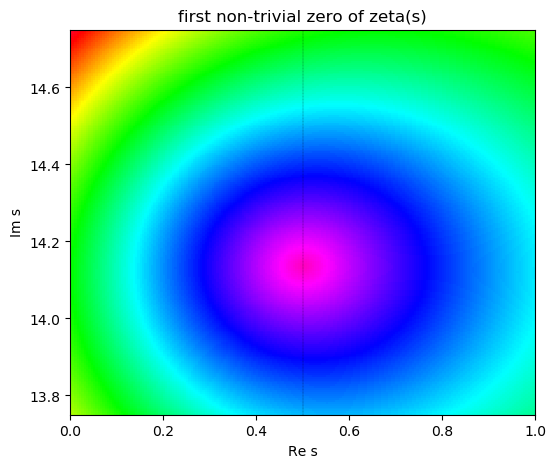

  1.448878 seconds (13.89 M allocations: 361.202 MiB, 6.27% gc time)


PyObject <matplotlib.collections.LineCollection object at 0x00000000572ADE10>

In [11]:
f(s) = sum(k -> eulerweight(L,k)*(-1)^k/(1+k)^s, 0:L-1)/(1-2^(1-s))
x = 0.0:0.005:1.0
y = 13.75:0.005:14.75
z = x' .+ im.*y
@time w = f.(z)
# plot(size=(600, 500), title="first non-trivial zero of zeta(s)")
# heatmap!(x, y, abs.(w), color=:rainbow, xlabel="Re s", ylabel="Im s")
# vline!([0.5], color="gray", ls=:dot, label="")
cmap = ["prism", "CMRmap", "gist_rainbow_r"]
plt.figure(figsize=(6,5))
plt.title("first non-trivial zero of zeta(s)")
plt.pcolormesh(x, y, abs.(w), cmap=cmap[3])
plt.xlabel("Re s")
plt.ylabel("Im s")
plt.vlines([0.5], extrema(y)..., lw=0.2, ls="--")

複素平面における実部が $0$ から $1$ の縦に無限に長い帯状の領域を $\zeta(s)$ の critical strip と呼ぶ.  $\zeta(s)$ の critical strip における零点を $\zeta(s)$ の非自明な零点と呼ぶ.

**Riemann予想:** $\zeta(s)$ の非自明な零点の実部はすべて $1/2$ である. $\QED$

この予想は非常に有名であり, もしも証明されれば素数の分布に関する精密な評価が得られる.

**問題:** $\zeta(s)$ のcritical stripにおける様子をプロットせよ. $\QED$

次のセルを見よ. 虚部が12から45までのcritical stripでの $\zeta(s)$ の様子がプロットされている. 少なくともその範囲内で $\zeta(s)$ の非自明な零点の実部はどれも $1/2$ になっていそうなことがわかる.

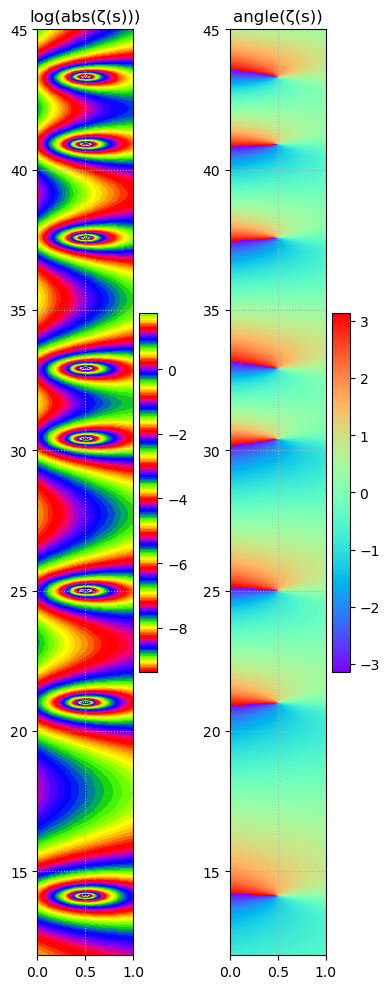

  2.965663 seconds (967.40 k allocations: 59.529 MiB)


In [12]:
x = 0:0.01:1
y = 12:0.005:45
s = x' .+ y*im
@time w = zeta.(s)

plt.figure(figsize=(4,10))

plt.subplot(121)
plt.pcolormesh(x, y, log.(abs.(w)), cmap="prism")
plt.colorbar()
plt.grid(ls=":")
plt.title("log(abs(ζ(s)))")

plt.subplot(122)
plt.pcolormesh(x, y, angle.(w), cmap="rainbow")
plt.colorbar()
plt.grid(ls=":")
plt.title("angle(ζ(s))")

plt.tight_layout()

#### 無限和と積分の交換に関する注意

上では $\int_0^1 x^n\,dx = 1/(n+1)$ となることと, 無限和 $1-x+x^2-x^3+\cdots$ と積分 $\int_0^1 dx$ の順序を交換できることを用いた. 

無限和と積分の順序交換が可能なことは以下のようにして確認できる. まず $|x|<1$ で

$$
\frac{1}{1+x} = 1 - x + x^2 - x^3 + \cdots + (-1)^{N-1}x^{N-1}+(-1)^N\frac{x^N}{1+x}
$$

となることを確認せよ. この公式を使うと, 

$$
\int_0^1\frac{dx}{1+x} = 
1-\frac{1}{2}+\frac{1}{3}+(-1)^{N-1}\frac{1}{N} + (-1)^N\int_0^1 \frac{x^N}{1+x}\,dx
$$

さらに $0\leqq x\leqq 1$ のとき, $1 \leqq 1+x$ なので

$$
0 \leqq \frac{x^N}{1+x} \leqq x^N
$$

となるから, 

$$
0\leqq \int_0^1 \frac{x^N}{1+x}\,dx \leqq \int_0^1 x^N\,dx = \frac{1}{N+1}
$$

なので, $N\to\infty$ で

$$
\int_0^1 \frac{x^N}{1+x}\,dx \to 0.
$$

以上を合わせると, 

$$
\int_0^1\frac{dx}{1+x} = 
\lim_{N\to\infty} \sum_{n=1}^N \frac{(-1)^{n-1}}{n} = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{n}
$$

となることがわかる.

**注意:** 上の計算における $\ds (-1)^N\int_0^1 \frac{x^N}{1+x}\,dx$ のように, 極限で $0$ になって欲しい項が積分表示を持つことは多い. 極限で $0$ になって欲しい部分を「$+\cdots$」のように書くと正体不明で不安になるのだが, 積分表示を持つ場合にはそのような不安は完全に解消してしまう. $\QED$

#### 条件収束交代級数の例2 (arctan 1 = π/4)

**問題:** $\ds\sum_{n=1}^\infty\frac{(-1)^{n-1}}{2n-1}$ を求めよ.

**答え:** $\pi/4$.

**証明:** $a = \tan\theta$ の $-\pi/2<\theta<\pi/2$ における逆函数を $\theta = \arctan a$ と書くと,

$$
\int_0^a \frac{dt}{1+t^2} = \arctan a.
$$

この公式は左辺で $t=\tan\theta$ と置換すれば確認できる.

ゆえに, 

$$
\int_0^1\frac{dx}{1+x^2} = \arctan 1 = \frac{\pi}{4}
$$

一方, $|x|<1$ のとき

$$
\frac{1}{1+x^2} = 1 - x^2 + x^4 - x^6 + \cdots
$$

なので

$$
\int_0^1 \frac{dx}{1+x^2} = 
\int_0^1 (1 - x^2 + x^4 - x^6 + \cdots) =
1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots =
\sum_{n=1}^\infty \frac{(-1)^{n-1}}{2n-1}.
$$

したがって,  

$$
\int_0^1 \frac{dx}{1+x^2} = \arctan 1 = \frac{\pi}{4} = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{2n-1}.
\qquad\QED
$$

**問題:** 上の例の計算における無限和と積分の交換の正当化を実行せよ.

**解答例:** $0<t<1$ のとき

$$
\frac{1}{1+t^2} = 
\sum_{k=0}^{n-1}(-t^2)^k + \frac{(-t^2)^n}{1+t^2} =
\sum_{k=0}^{n-1}(-1)^k t^{2k} + (-1)^n\frac{t^{2n}}{1+t^2}
$$

なので,

$$
\int_0^1\frac{dt}{1+t^2} = 
\sum_{k=0}^{n-1}\frac{(-1)^k}{2k+1} + (-1)^n\int_0^1\frac{t^{2n}\,dt}{1+t^2}
\tag{$*$}
$$

でかつ

$$
0 \leqq \int_0^1\frac{t^{2n}\,dt}{1+t^2} \leqq
\int_0^1 t^{2n}\,dt = \frac{1}{2n+1} \to 0 \quad(n\to\infty)
$$

であるから, $\ds \int_0^1\frac{t^{2n}\,dt}{1+t^2}\to 0$ となる. したがって, ($*$)で $n\to\infty$ とすることによって, 

$$
\frac{\pi}{4} = \int_0^1\frac{dt}{1+t^2} = \sum_{k=0}^{\infty}\frac{(-1)^k}{2k+1}
$$

を得る. $\QED$

**注意:** 多くの解説で, この例の証明にAbelの連続性定理を使っているようだ. しかし, この場合には以上のように初等的かつ明瞭かつ単純な方法で証明可能である. 特別に簡単な場合について, Abelの連続性定理のような一般的な定理を適用して処理することを機械的に繰り返すと, 数学の内容を誤解してしまう危険性があるので注意した方がよい. $\QED$

**問題:** 以上の例以外の条件収束級数の例について調べ, ノートにまとめよ. $\QED$

以下はコンピューターによる計算.

In [13]:
n = symbols("n", integer=true)
S = sympy.Sum((-1)^(n-1)/(2n-1), (n, 1, oo)).doit()

pi
--
4 

In [14]:
N = 10^8
SimpleSum = sum(n->(-1)^(n-1)/(2n-1), 1:N)
TrueValue = π/4
@show SimpleSum
@show TrueValue
@show SimpleSum - TrueValue;

SimpleSum = 0.7853981608974486
TrueValue = 0.7853981633974483
SimpleSum - TrueValue = -2.499999651739415e-9


In [15]:
L = 2^6
EulerTran = sum(k->eulerweight(L,k)*(-1)^k/(2k+1), 0:L-1)
TrueValue = π/4
@show EulerTran
@show TrueValue
@show EulerTran - TrueValue

EulerTran = 0.7853981633974486
TrueValue = 0.7853981633974483
EulerTran - TrueValue = 3.3306690738754696e-16


3.3306690738754696e-16

以下はコンピューターによる $\ds\int_0^1\frac{dx}{1+x^3}$ や $\ds\int_0^1\frac{dx}{1+x^4}$ などの計算.

In [16]:
x = symbols("x", real=true, positive=true)
integrate(1/(1+x^3), (x,0,1))

           ___   
log(2)   \/ 3 *pi
------ + --------
  3         9    

In [17]:
x = symbols("x", real=true, positive=true)
integrate(x/(1+x^3), (x,0,1))

             ___   
  log(2)   \/ 3 *pi
- ------ + --------
    3         9    

In [18]:
x = symbols("x", real=true, positive=true)
integrate(x^2/(1+x^3), (x,0,1))

log(2)
------
  3   

In [19]:
x = symbols("x", real=true, positive=true)
integrate(1/(1+x^4), (x,0,1))

    ___    /      ___\     ___    /  ___    \     ___   
  \/ 2 *log\2 - \/ 2 /   \/ 2 *log\\/ 2  + 2/   \/ 2 *pi
- -------------------- + -------------------- + --------
           8                      8                8    

In [20]:
x = symbols("x", real=true, positive=true)
integrate(x/(1+x^4), (x,0,1))

pi
--
8 

In [21]:
x = symbols("x", real=true, positive=true)
integrate(x^2/(1+x^4), (x,0,1))

    ___    /  ___    \     ___    /      ___\     ___   
  \/ 2 *log\\/ 2  + 2/   \/ 2 *log\2 - \/ 2 /   \/ 2 *pi
- -------------------- + -------------------- + --------
           8                      8                8    

In [22]:
x = symbols("x", real=true, positive=true)
integrate(x^3/(1+x^4), (x,0,1))

log(2)
------
  4   

In [23]:
x = symbols("x", real=true, positive=true)
s = symbols("s", real=true, positive=true)
J = simplify(integrate(1/(1+x^(1/s)), (x,0,1)))

          / I*pi      \
s*lerchphi\e    , 1, s/

In [24]:
sympy.lerchphi(Sym(:z), Sym(:s), Sym(:a))

lerchphi((z,), (s,), (a,))

Lerchの超越函数(レルヒの超越函数) $\Phi(z,s,a)$ は次のように定義される:

$$
\Phi(z, s, a) = \sum_{n=0}^\infty \frac{z^n}{(n + a)^s}.
$$

Lerchの超越函数についてはノート「12 Fourier解析」のPoissonの和公式の応用の解説を参照せよ.

In [25]:
x = symbols("x", real=true, positive=true)
s = symbols("s", real=true, positive=true)
J = simplify(integrate(1/(1+x^(1/s)), (x,0,oo)))

/      pi*s                      
|   ---------      for s - 2 < -1
|   sin(pi*s)                    
|                                
| oo                             
|  /                             
| |                              
< |      1                       
| |  --------- dx    otherwise   
| |  s ___                       
| |  \/ x  + 1                   
| |                              
|/                               
|0                               
\                                

## 複素数の級数

この節では複素数 $a_n$ の級数 $\ds\sum_{n=1}^\infty a_n$ を扱う.

### 複素数の絶対収束級数

**定理:** 複素数 $a_1,a_2,\ldots$ について, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束する. このとき, 級数 $\ds\sum_{n=1}^\infty a_n$ は**絶対収束**するという. $\QED$

絶対収束していないが収束する級数は**条件収束**するという.

上の定理の証明は略す. しかし, 下の方で, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束する直観的な理由を説明する.

**例:** $\theta$ は実数であるとする. このとき, 複素級数 $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n^{3/2}}$ は絶対収束する. 以下のセルにおける計算とプロットを参照せよ.

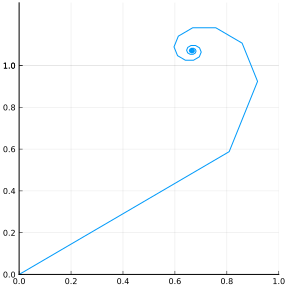

In [26]:
θ = 2π/10
a(n) = exp(im*n*θ)/n^1.5
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
N = 70
n = 0:N
z = sum_a.(n)
plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.3))
plot!(real.(z), imag.(z), legend=false)#, line=:arrow)

  8.702454 seconds (2.30 M allocations: 106.871 MiB, 0.40% gc time)
  1.160573 seconds (2.34 M allocations: 108.704 MiB, 3.30% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\genkuroki\OneDrive\Calculus\sum_a.gif
└ @ Plots C:\Users\genkuroki\.julia\packages\Plots\8GUYs\src\animation.jl:102



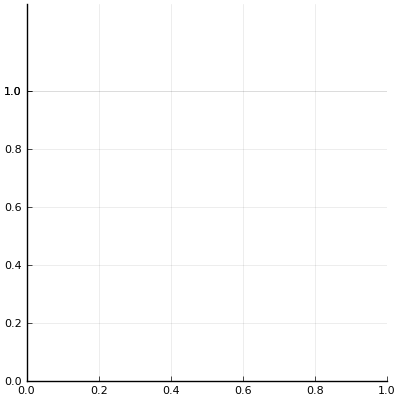

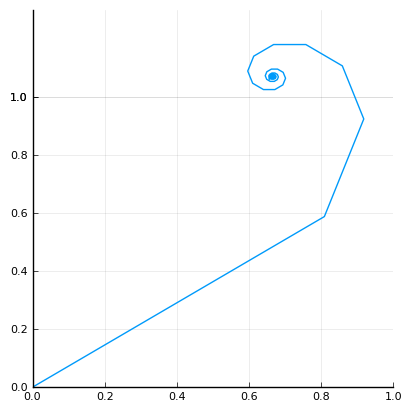

In [27]:
θ = 2π/10
a(n) = exp(im*n*θ)/n^1.5
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
@time anim = @animate for N in 0:70
    n = 0:N
    z = sum_a.(n)
    plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.3))
    plot!(real.(z), imag.(z), legend=false, line=:arrow)
end

gifname = "sum_a.gif"
@time gif(anim, gifname; fps=10)
sleep(0.1)
showimg("image/gif", gifname)

**絶対収束の概念の直観的な説明:**

各複素数 $a_n$ は平面上の点と同一視できる(複素平面の考え方).

平面上の点と原点からその点への矢線(ベクトル)は同一視できる(ベクトルの考え方).

複素数の和はベクトルの和に対応している.

ベクトルの和は矢線としてのベクトルを連結することを意味する(ベクトルの和の幾何学的意味).

ゆえに, $\ds s_N = \sum_{n=1}^N a_n$ は各 $a_1,a_2,\ldots,a_N$ の各々に対応する矢線を連結して得られる折れ線の先端の点に対応する複素数に等しい.

$\ds L = \sum_{n=1}^\infty|a_n|$ は各 $a_n$ に対応する矢線の長さの総和を意味する. 

ゆえに, $L$ が有限の値になることは, 各 $a_n$ に対応する矢線をすべて連結して得られる折れ線の長さが有限になることを意味する.

そのとき, $a_n$ に対応する矢線をすべて連結して得られる折れ線の「先端」の点に対応する複素数が級数 $\ds \sum_{n=1}^\infty a_n$ の収束先になる.

1つ前のセルのアニメーションはそのような様子の一例になっている.

**注意:** 上の説明を理解できれば, 級数 $\ds\sum_{n=1}^\infty |a_n|$ が有限の値に収束するならば, 級数 $\ds\sum_{n=1}^\infty a_n$ も収束することも十分に納得できると思う. その直観は数学的には<a href="https://www.google.co.jp/search?q=%E5%AE%8C%E5%82%99%E6%80%A7+%E7%B5%B6%E5%AF%BE%E5%8F%8E%E6%9D%9F">**完備性**</a>の概念によって正当化される. $\QED$

### 条件収束する複素級数の例

**問題:** $\theta$ は実数であり, $e^{i\theta}\ne 1$ であると仮定する. このとき $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n}$ は条件収束することを示せ. $\QED$

**注意:** $-\log(1-z)$ の収束半径 $1$ のMaclaurin展開は

$$
-\log(1-z) = \sum_{n=1}^\infty\frac{z^n}{n}
$$

の形をしている. $\theta\in\R$, $e^{i\theta}\ne 1$ のとき, $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n}$ の収束先は $-\log(1-e^{i\theta})$ になる. $\QED$

**解答例1:** $z=e^{i\theta}$, $\theta\in\R$ とおき,  $\ds s_n(z) = \sum_{k=1}^n \frac{z^k}{k}$ とおく. $z\ne 1$ のとき, $s_n(z)$ が $n\to\infty$ で収束することを示せばよい.

$$
\begin{aligned}
(z-1)s_n(z) &=
\left(\frac{z^2}{1}+\frac{z^3}{2}+\cdots+\frac{z^n}{n-1}+\frac{z^{n+1}}{n}\right)
\\ &\;-
\left(\frac{z}{1}+\frac{z^2}{2}+\frac{z^3}{3}+\cdots+\frac{z^n}{n}\right)
\\ &=
\frac{z^{n+1}}{n}-\frac{z}{1} + S_n(z).
\end{aligned}
$$

ここで,

$$
S_n(z) = 
\left(\frac{1}{1}-\frac{1}{2}\right)z^2+
\left(\frac{1}{2}-\frac{1}{3}\right)z^3+
\cdots+
\left(\frac{1}{n-1}-\frac{1}{n}\right)z^n.
$$

$|z|=1$ なので, $n\to\infty$ のとき $\ds\frac{z^{n+1}}{n}\to 0$ となるので, $(z-1)s_n(z)$ が $n\to\infty$ で収束することを示すためには, $S_n(z)$ が絶対収束することを示せば十分であり, $|z|=1$ より,

$$
\begin{aligned}
&
\left|\left(\frac{1}{1}-\frac{1}{2}\right)z^2\right|+
\left|\left(\frac{1}{2}-\frac{1}{3}\right)z^3\right|+
\cdots+
\left|\left(\frac{1}{n-1}-\frac{1}{n}\right)z^n\right|
\\ &=
\left(\frac{1}{1}-\frac{1}{2}\right)+
\left(\frac{1}{2}-\frac{1}{3}\right)+
\cdots+
\left(\frac{1}{n-1}-\frac{1}{n}\right) =
\frac{1}{1}-\frac{1}{n}\to 1 \quad(n\to\infty)
\end{aligned}
$$

なので, $S_n(z)$ は絶対収束する. これで $n\to\infty$ で $(z-1)s_n(z)$ が収束することがわかった. $z\ne 1$ なので, $s_n(z)$ も $n\to\infty$ で収束する. $\QED$

**解答例1の一般化:** $a_n\geqq 0$ であり, $a_n$ は単調減少しながら $0$ に収束していると仮定する. このとき, $\theta$ は実数であり, $e^{i\theta}\ne 1$ ならば, $\ds \sum_{n=1}^\infty a_n e^{in\theta}$ は収束している. 例えば, $\ds a_n = \frac{1}{\sqrt{n}}$ や $\ds a_n = \frac{1}{\log n}$ の場合にも $\ds \sum_{n=1}^\infty a_n e^{in\theta}$ は収束している.

**証明:** $z=e^{i\theta}$, $\ds s_n(z) = \sum_{k=0}^n a_k z^k$ とおく. $s_n(z)$ が $n\to\infty$ で収束していることを示せばよい. 上の解答例と同様にして,

$$
(z-1)s_n(z) = a_n z^{n+1} - a_1 z + S_n(z), \quad
S_n(z) = \sum_{k=2}^n (a_{k-1}-a_k)z^k.
$$

そして, $|z|=1$ でかつ $a_n\to 0$ より, $a_n z^{n+1}\to 0$ となる. さらに,

$$
\sum_{k=2}^n \left|(a_{k-1}-a_k)z^k\right| =
\sum_{k=2}^n(a_{k-1}-a_k) = a_1 - a_n \to a_1 \quad (n\to\infty)
$$

なので, $S_n(z)$ は $n\to\infty$ で絶対収束する. $z\ne 1$ なので $s_n(z)$ も $n\to\infty$ で収束する. $\QED$

**さらなる一般化:** 一般に $\ds S_n = \sum_{k=1}^n a_k b_k$ のとき, $\ds A_k = \sum_{j=1}^k a_j$, $A_0=0$ とおくと, $a_k = A_k - A_{k-1}$ なので

$$
\begin{aligned}
S_n &= \sum_{k=1}^n (A_k - A_{k-1}) b_k =
\sum_{k=1}^n A_k b_k - \sum_{k=0}^{n-1} A_k b_{k+1}
\\ &=
A_n b_n - A_0 b_1 + \sum_{k=1}^{n-1} A_k(b_k - b_{k+1}).
\end{aligned}
$$

この公式は部分積分の公式の和に関するバージョンであることに注意せよ. (「部分積分」のアイデアは普遍的によく現われる.)

仮定の追加1: 数列 $b_k$ は単調減少実数列でかつ $0$ に収束すると仮定する.

このとき, $b_k-b_{k+1}\geqq 0$ でかつ

$$
\sum_{k=1}^{n-1} (b_k - b_{k+1}) = b_1 - b_n \to b_1 \quad (n\to\infty).
$$

仮定の追加2: $A_k$ は有界数列であると仮定する. すなわちある正の実数で $|A_k|\leqq M$ ($k=1,2,\ldots$) を満たすものが存在すると仮定する.

このとき, 

$$
\sum_{k=1}^\infty|A_k||b_k-b_{k+1}|\leqq
M\sum_{k=1}^\infty(b_k-b_{k+1}) = M b_1 < \infty
$$

なので 級数 $\ds\sum_{k=1}^\infty A_k(b_{k+1} - b_k)$ は絶対収束する. さらに, $n\to\infty$ で $b_n\to 0$ なので $A_n b_n\to 0$ となる. ゆえに級数 $\ds\sum_{k=1}^\infty a_k b_k$ は収束する. (積分の場合にも, 絶対収束しない積分を部分積分によって絶対収束する積分に変形できる場合がある. 各自自分で研究してみよ.) $\QED$

**解答例2:** 以上の一般論を上の問題に適用しよう. すなわち $a_n = e^{in\theta}$, $b_n=1/n$ の場合を考える. このとき

$$
A_k = \sum_{j=1}^k a_j = \frac{e^{i\theta}-e^{i(n+1)\theta}}{1-e^{i\theta}}
$$

であるから, $|A_k|\leqq 2/|1-e^{i\theta}|$ なので, $A_k$ は有界である. 実数列 $b_k$ は単調減少しながら $0$ に収束する. したがって上の一般論より, 級数 $\ds\sum_{n=1}^\infty\frac{e^{in\theta}}{n}$ は条件収束する. $\QED$

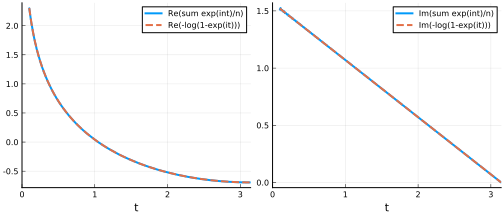

In [28]:
f(z) = -log(1-z)
g(z; N=1000) = sum(n->z^n/n, 1:N)

θ = 0.1:0.01:π
v = @.(f(exp(im*θ)))
w = @.(g(exp(im*θ)))

P1 = plot(xlims=(0,π), xlabel="t")
plot!(θ, real.(w), label="Re(sum exp(int)/n)",  lw=2)
plot!(θ, real.(v), label="Re(-log(1-exp(it)))", lw=2, ls=:dash)

P2 = plot(xlims=(0,π), xlabel="t")
plot!(θ, imag.(w), label="Im(sum exp(int)/n)",  lw=2)
plot!(θ, imag.(v), label="Im(-log(1-exp(it)))", lw=2, ls=:dash)

plot(P1, P2, size=(700,300))

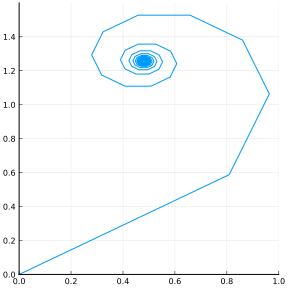

In [29]:
θ = 2π/10
a(n) = exp(im*n*θ)/n
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
N = 400
n = 0:N
z = sum_a.(n)
plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.6))
plot!(real.(z), imag.(z), legend=false)#, line=:arrow)

 12.927332 seconds (15.00 M allocations: 485.121 MiB, 1.74% gc time)
  0.696175 seconds

┌ Info: Saved animation to 
│   fn = C:\Users\genkuroki\OneDrive\Calculus\sum_b.gif
└ @ Plots C:\Users\genkuroki\.julia\packages\Plots\8GUYs\src\animation.jl:102


 (601 allocations: 127.109 KiB)



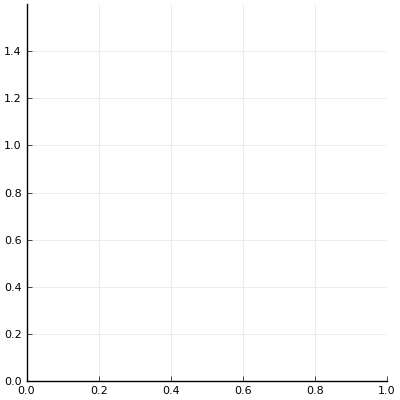

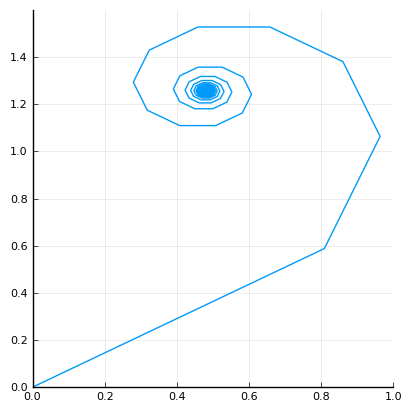

In [30]:
θ = 2π/10
a(n) = exp(im*n*θ)/n
sum_a(n) = iszero(n) ? Complex(0.0) : sum(k->a(k), 1:n)
@time anim = @animate for N in 0:4:400
    n = 0:N
    z = sum_a.(n)
    plot(size=(400, 400), xlims=(0,1.0), ylim=(0,1.6))
    plot!(real.(z), imag.(z), legend=false, line=:arrow)
end

gifname = "sum_b.gif"
@time gif(anim, gifname; fps=10)
sleep(0.1)
showimg("image/gif", gifname)

上のセルのアニメーションの折れ線の長さは無限大である. 無限に長くなる折れ線の先端が無限に回転しながら収束している.

### 多重対数函数

複素数 $z$ に関するべき級数

$$
\Li_r(z) = \sum_{n=1}^\infty \frac{z^n}{n^r}
$$

は $r>1$, $|z|\leqq 1$ および $r=1$, $|z|<1$ のとき絶対収束する. $r=1$, $|z|=1$ の場合には $z\ne 1$ なら条件収束し, $z=1$ ならば $\infty$ に発散する.  このように定義される函数 $\Li_r(z)$ を $r$ 重の**多重対数函数**(polylogarithm)と呼ぶ. $r=2$ の場合はdilogarithmと呼ばれ, $r=3$ の場合にはtrilogarithmと呼ばれる. このとき, 

$$
\begin{aligned}
&
\Li_1(z)=\sum_{n=1}^\infty\frac{z^n}{n} = -\log(1-z) = \int_0^z \frac{dt}{1-t},
\\ &
\Li_2(z)=\sum_{n=1}^\infty\frac{z^n}{n^2} = \int_0^z \frac{\Li_1(t)}{t}\,dt =
\int_0^z dt_2 \int_0^{t_2} dt_1\,\frac{1}{(1-t_1)t_2},
\\ &
\Li_3(z)=\sum_{n=1}^\infty\frac{z^n}{n^3} = \int_0^z \frac{\Li_2(t)}{t}\,dt =
\int_0^z dt_3 \int_0^{t_3} dt_2 \int_0^{t_2} dt_1\, \frac{1}{(1-t_1)t_2t_3},
\\ &\ldots\ldots\ldots\ldots\ldots
\\ &
\Li_r(z)=\sum_{n=1}^\infty\frac{z^n}{n^r} = \int_0^z \frac{\Li_2(t)}{t}\,dt =
\int_0^z dt_r \int_0^{t_r} dt_{r-1}\cdots\int_0^{t_2} dt_1\,\frac{1}{(1-t_1)t_2\cdots t_r},
\end{aligned}
$$

$r>1$ のとき,

$$
\Li_r(1) = \sum_{n=1}^\infty \frac{1}{n^r} = \zeta(r).
$$

したがって, 2以上の整数 $m$ に対して,

$$
\zeta(m) = \Li_m(1) = 
\int_0^1 dt_m\int_0^{t_m}dt_{m-1}\cdots\int_0^{t_2}dt_1\frac{1}{(1-t_1)t_2\cdots t_m}.
$$

$t_1=x_1 x_2\cdots x_m$, $t_2=x_2\cdots x_m$, $\ldots$, $t_m=x_m$ と置換すると,

$$
\zeta(m) = \Li_m(1) = 
\int_0^1 dx_m\int_0^1 dx_{m-1}\cdots\int_0^1 dx_1\frac{1}{1-x_1\cdots x_m}.
$$

これの右辺が $\zeta(m)$ に一致することは

$$
\begin{aligned}
&
\frac{1}{1-x_1\cdots x_m} = \sum_{n=1}^\infty x_1^{n-1}\cdots x_m^{n-1}, 
\\ &
\int_0^1 dx_m\int_0^1 dx_{m-1}\cdots\int_0^1 dx_1\,x_1^{n-1}\cdots x_m^{n-1} =
\left(\int_0^1 x^{n-1}\,dx\right)^m = \frac{1}{n^m}
\end{aligned}
$$

に注意すれば明らかであろう.

### 二重対数函数のζ(2)の近似計算への応用

$\ds\zeta(2)=\sum_{n=1}^\infty \frac{1}{n^2}$ を計算せよという問題は**Basel問題**と呼ばれているらしい. Basel問題はEulerによって1743年ころに解かれたらしい. Eulerがどのように考えたかについては次の文献を参照せよ.

* 杉本敏夫, <a href="http://www.kurims.kyoto-u.ac.jp/~kyodo/kokyuroku/contents/pdf/1583-12.pdf">バーゼル問題とオイラー</a>, 2007年8月23日, 数理解析研究所講究録, 第1583巻, 2008年, pp.159-167

その第6節によれば, Eulerは, 積分 $\ds\int\frac{-\log(1-x)}{x}\,dx$ を2通りに計算して比較することによって, $\zeta(2)$ を定義に基いて直接計算するよりもずっと少ない項数の和で同精度で $\zeta(2)$ の計算する方法を発見している.

現代的には二重対数函数(dilogarithm, 以下ダイログと呼ぶ)を用いてその近似計算法を見付けたことになる. ダイログ $\Li_2(z)$ の定義は

$$
\Li_2(z) = \int_0^z \frac{-\log(1-x)}{x}\,dx = \sum_{n=1}^\infty \frac{z^n}{n^2}
$$

であった. $x=1-y$ と置換すると,

$$
\Li(z) = \int_1^{1-z} \frac{\log y}{1-y}\,dy
$$

となり, 

$$
\frac{d}{dy}\left(-\Li_2(y) -\log(1-y)\log y\right) = \frac{\log y}{1-y}
$$

なので, $\Li_2(1)=\zeta(2)$ と $y\to 1$ で $\log(1-y)\log y\to 0$ となることより, 

$$
\Li_2(z) = \left[-\Li_2(y)-\log(1-y)\log y\right]_1^{1-z} = -\Li_2(1-z)+\zeta(2)-\log z\,\log(1-z).
$$

すなわち,

$$
\zeta(2) = \Li_2(z) + \Li_2(1-z) + \log z\,\log(1-z).
$$

特に $z=1/2$ のとき,

$$
\zeta(2) = 2\Li_2(1/2) + (\log 2)^2 =
\sum_{n=1}^\infty \frac{1}{2^{n-1} n^2} + (\log 2)^2.
$$

$\zeta(2)$ の定義に基いて最初の10項を足した結果

$$
\sum_{n=1}^{10} \frac{1}{n^2} = 1.54976\;77311\;665\cdots
$$

は正確な値 $\ds\zeta(2)=\frac{\pi^2}{6}=1.64493\;40668\;482\cdots$ と整数部分しか一致しないが,

$$
\sum_{n=1}^{10} \frac{1}{2^{n-1} n^2} + (\log 2)^2 = 1.64492\;00516\;736\cdots
$$

は正確な値に小数点以下第4桁まで一致している. 最初の30項の和では, 前者は $1.61215\;01176\;015\cdots$ で正確な値と小数点以下第1桁までしか一致しないが, 後者の $1.64493\;40668\;463\cdots$ は小数点以下第11桁まで一致している.

In [31]:
Q(N) = sum(n->1/n^2, 1:N)
R(N) = sum(n->1/(2.0^(n-1)*n^2), 1:N) + log(2)^2
@show Q(10), Q(10)-π^2/6, R(10), R(10)-π^2/6
@show Q(30), Q(30)-π^2/6, R(30), R(30)-π^2/6
[(N, Q(N), Q(N)-π^2/6, R(N), R(N)-π^2/6) for N in 10:10:50]

(Q(10), Q(10) - π ^ 2 / 6, R(10), R(10) - π ^ 2 / 6) = (1.5497677311665408, -0.09516633568168564, 1.6449200516736968, -1.4015174529591334e-5)
(Q(30), Q(30) - π ^ 2 / 6, R(30), R(30) - π ^ 2 / 6) = (1.6121501176015975, -0.03278394924662886, 1.6449340668463974, -1.828981410767483e-12)


5-element Array{Tuple{Int64,Float64,Float64,Float64,Float64},1}:
 (10, 1.5497677311665408, -0.09516633568168564, 1.6449200516736968, -1.4015174529591334e-5)
 (20, 1.5961632439130233, -0.04877082293520307, 1.644934062865116, -3.9831105080878615e-9)
 (30, 1.6121501176015975, -0.03278394924662886, 1.6449340668463974, -1.828981410767483e-12)
 (40, 1.6202439630069352, -0.024690103841291222, 1.6449340668482253, -1.1102230246251565e-15)
 (50, 1.6251327336215293, -0.019801333226697082, 1.6449340668482262, -2.220446049250313e-16)

### 二重対数函数のζ(2)の正確な計算への応用

以下の議論は次のリンク先の方法の引き写しである:

* https://www.theoremoftheday.org/Analysis/Basel/TotDBasel.pdf

複素函数としての $\log z = \log|z| + i\arg z$, $-\pi<\arg z<\pi$ を使う. 

$|z|<1$, $\ds -\pi<\arg z<\pi$ と仮定する. このとき, $\ds 1+z^{-1}=\frac{1+z}{z}$ より, 図を描いて確認すれば

$$
\arg(1+z^{-1}) = \arg(1+z) - \arg z
$$

となっていることがわかる. ゆえに

$$
\begin{aligned}
\log(1+z^{-1}) - \log(1+z) &=
\log\left|\frac{1+z^{-1}}{1+z}\right| + i(\arg(1+z^{-1})-\arg(1+z)) 
\\ &=
-\log|z|-i\arg z = -\log z.
\end{aligned}
$$

そして, 

$$
\begin{aligned}
&
(\Li_2(-z^{-1}))' = \frac{-\log(1-(-z^{-1}))}{-z^{-1}}z^{-2} = \frac{\log(1+z^{-1})}{z},
\\ &
(\Li_2(-z))' = \frac{-\log(1-(-z))}{-z}(-1) = \frac{-\log(1+z)}{z}, 
\\ &\therefore\quad
(\Li_2(-z^{-1})+\Li_2(-z))' = \frac{\log(1+z^{-1})-\log(1+z)}{z} = \frac{-\log z}{z}
\\ &
\left(-\frac{1}{2}(\log z)^2\right)' = \frac{-\log z}{z}
\end{aligned}
$$

なので, ある定数 $C$ が存在して,

$$
\Li_2(-z^{-1})+\Li_2(-z) = -\frac{1}{2}(\log z)^2 + C.
$$

$-\pi<\arg z<\pi$ と仮定していたことに注意しながら, $z \to 1$ とすると,

$$
2\Li_2(-1) = C.
$$

$-\pi<\arg z<\pi$ と仮定していたことに注意しながら, $z\to -1$ とすると,

$$
2\Li_2(1) = 
-\frac{1}{2}(\pm\pi i)^2 + C =
\frac{\pi^2}{2} + 2\Li_2(-1).
$$

$\ds \Li_2(1)+\Li_2(-1)=\sum_{n=1}^\infty \frac{1}{n^2}+\sum_{n=1}^\infty \frac{(-1)^n}{n^2}=\sum_{k=1}^\infty\frac{2}{(2k)^2} = \frac{1}{2}\Li_2(1)$ より, $2\Li_2(-1) = -\Li(1)$ なので, 上で示した $\ds 2\Li_2(1)=\frac{\pi^2}{2}+2\Li_2(-1)$ と合わせて, $\ds \zeta(2)=\Li_2(1)=\frac{\pi^2}{6}$ となることがわかる.

要するに, $\zeta(2)$ は二重対数函数の $\Li_2(-z^{-1})$ と $\Li_2(-z)$ のあいだの接続公式のモノドロミー(不定性)を注意深く扱えば自然に計算できてしまうということである. (注意: $\Li_2(z^{-1})$ と $\Li_2(z)$ を使っても同様の方法で示せる.)

### 二重対数函数の高木貞治『解析概論』§35の例2(p.113)への応用

**問題:** 次を示せ:

$$
I := \int_0^{\pi/2} \log(\sin x)\,dx = -\frac{\pi}{2}\log 2.
$$

**解答例(高木貞治『解析概論』§35の例2(p.113)):** $\sin(\pi/2-x)=\cos x$ より, $\ds I = \int_0^{\pi/2}\log(\cos x))\,dx$. $\sin(\pi-x)=\sin x$ より, $\ds I=\int_{\pi/2}^\pi\log(\sin x)\,dx$ なので $\ds\int_0^\pi\log(\sin x)\,dx=2I$. そこで, $x=2t$ と置換して, $\sin(2t)=2\cos t\sin t$ を使うと,

$$
I = \frac{1}{2}\int_0^\pi\log(\sin x)\,dx =
\int_0^{\pi/2}\log(2\cos t\sin t)\,dt =
\frac{\pi}{2}\log 2 + I + I.
$$

ゆえに $\ds I = -\frac{\pi}{2}\log 2$. $\QED$

**注意:** 上の問題の定積分は, 高木貞治『解析概論』§35の例2(p.113)だけではなく, 同書§62の例3(p.225)でも扱われている. そこでは

$$
\frac{\log(1-z)}{z} = -1 -z -\frac{z^2}{2} - \cdots
$$

の原点を中心とする周回積分を用いて,

$$
\int_0^\pi \log(1-2r\cos\theta+r^2)\,\theta = 2\pi\log r \qquad(r>0)
$$

を得ている. そしてこれの $r=1$ の場合から上の問題の結果を得ている. 二重対数函数の定義は $\ds\frac{-\log(1-z)}{z}$ の不定積分だったので, 上の問題は二重対数函数と関係していることになる.  以下の2つの問題も見よ. $\QED$

**問題(WolframAlpha):** 次の $F(x)$ について $F'(x)=\log(\sin x)$ となることを示せ.

$$
F(x) = \frac{i}{2}x^2+\frac{i}{2}\Li_2(e^{2ix}) - x\log(1-e^{2ix}) + x\log(\sin x). 
$$

**解答例:** $\ds\Li_2'(x)=-\frac{\log(1-x)}{x}$, $\ds(-\log(1-x))'=\frac{1}{1-x}$ より,

$$
\begin{aligned}
F'(x) &=
ix + \frac{i}{2}2i e^{2ix}\frac{-\log(1-e^{2ix})}{e^{2ix}} - \log(1-e^{2ix}) + x \frac{2ie^{2ix}}{1-e^{2ix}} + x\frac{\cos x}{\sin x} + \log(\sin x).
\end{aligned}
$$

第2項と第3項がキャンセルして消える. さらに, 

$$
x\frac{\cos x}{\sin x}=ix\frac{e^{ix}+e^{-ix}}{e^{ix}-e^{-ix}} = 
ix\frac{e^{2ix}+1}{e^{2ix}-1}
$$

を代入すると, 第1,4,5項の和を $ix$ で割ったものは

$$
1 + \frac{-2e^{2ix}}{e^{2ix}-1} + \frac{e^{2ix}+1}{e^{2ix}-1} = 0
$$

となるので, $F'(x)=\log(\sin x)$ となることがわかる. $\QED$

筆者はこの問題の $F(x)$ の式は<a href="http://www.wolframalpha.com/input/?i=%5Cint+log(sin+x)+dx">WolframAlphaによる計算</a>で知った.

**問題:** すぐ上の問題の結果を用いて, 次を示せ:

$$
\int_0^{\pi/2}\log(\sin x)\,dx = -\frac{\pi}{2}\log 2, \quad
\zeta(2) = \Li_2(1) = \frac{\pi^2}{6}.
$$

**解答例:** $\Li_2(1)$ と $\Li(-1)$ は

$$
\Li_2(1) = \sum_{n=1}^\infty \frac{1}{n^2}, \quad
\Li_2(-1) = \sum_{n=1}^\infty \frac{(-1)^n}{n^2}
$$

と表わされるので, 

$$
\Li_2(1)+\Li_2(-1)=\sum_{k=1}^\infty\frac{2}{(2k)^2} = \frac{1}{2}\Li_2(1).
$$

ゆえに

$$
\Li_2(-1) = -\frac{1}{2}\Li(1).
\tag{1}
$$

そして, 上の問題の $F(x)$ について

$$
F\left(\frac{\pi}{2}\right) = \frac{\pi^2}{8}i + \frac{i}{2}\Li_2(-1) -\frac{\pi}{2}\log 2, \quad
F(0) = \frac{i}{2}\Li_2(1)
$$

なので, 上の問題の結論より, 

$$
\R\ni \int_0^{\pi/2}\log(\sin x)\,dx = [F(x)]_0^{\pi/2} =
\frac{\pi^2}{8}i + \frac{i}{2}\Li_2(-1) -\frac{\pi}{2}\log 2 - \frac{i}{2}\Li_2(1).
$$

両辺の実部と虚部(の2倍)を比較して, $\ds \int_0^{\pi/2}\log(\sin x)\,dx = -\frac{\pi}{2}\log 2$ と

$$
0 = \frac{\pi^2}{4}+\Li_2(-1)-\Li_2(1)
\tag{2}
$$

を得る. 以上の(1),(2)より, $\ds\zeta(2)=\Li_2(1)=\frac{\pi^2}{6}$ が得られる. $\QED$

**注意:** 以上の計算に関連する話題については, <a href="https://twitter.com/genkuroki/status/830016144933167104">筆者によるツイッターにおける一連の発言</a>も参照せよ. $\QED$

### 二重対数函数の五項関係式

<a href="https://www.google.co.jp/search?q=Rogers+dilogarithm">Rogersの二重対数函数</a> $L(z)$ を次のように定義する:

$$
L(z) = 
\frac{1}{2}\int_0^z\left(\frac{-\log(1-x)}{x}+\frac{-\log x}{1-x}\right)\,dx =
\Li_2(z) + \frac{1}{2}\log z\;\log(1-z).
$$

1つ目の等号は $L(z)$ の定義であり, 2つ目の等号は次を使えば得られる:

$$
\frac{d}{dx}(\Li_2(x) +\log x\,\log(1-x)) = \frac{-\log x}{1-x}.
$$

$L(z)$ と $\Li_2(z)$ の違いは初等函数 $\ds\frac{1}{2}\log z\;\log(1-z)$ の分だけである.

$\ds \Li_2(0)=0$, $\ds \Li_2(1)=\zeta(2)=\frac{\pi^2}{6}$ より,

$$
L(0) = 0, \quad L(1) = \frac{\pi^2}{6}.
$$

この節では次の**五項関係式** (five-term relation)

$$
L(x) + L(1-xy) + L(y) + L\left(\frac{1-y}{1-xy}\right) + L\left(\frac{1-x}{1-xy}\right) = \frac{\pi^2}{2}.
\tag{FTR}
$$

を示そう. 二重対数函数の五項関係式については19世紀にすでに先行する研究結果があったが, この形式に整理された五項関係式は

* R. Rogers, On Function Sum Theorems Connected with the Series $\ds\sum_{n=1}^\infty\frac{z^n}{n^2}$,  Proc. London Math. Soc. 4 (1907), 169-189, <a href="https://doi.org/10.1112/plms/s2-4.1.169">DOI</a>

で証明された. 

**補題:** 函数 $f_i(x)$ 達について

$$
F(x, X) = \sum_{i=1}^N \log(f_i(x))\log(1-f_i(X))
$$

は $F(x,X)=F(X,x)$ を満たしていると仮定する. このとき, 

$$
f(x) = \sum_{i=1}^N L(f_i(x))
$$

は定数函数になる.

**証明:** $df=0$ を示せばよい.

$$
-2\,dL(x) = 
\frac{\log(1-x)\,dx}{x}+\frac{\log(x)\,dx}{1-x} =
d\log(x)\,\log(1-x) - \log(x)\,d\log(1-x) 
$$

なので, 

$$
-2\,df(x) = 
\sum_{i=1}^N d\log(f_i(x))\,\log(1-f_i(x)) - 
\sum_{i=1}^N \log(f_i(x))\,d\log(1-f_i(x)).
$$

$F(x,X)$ と $F(X,x)$ の $x$ に関する外微分 $d$ を取ると, 

$$
\begin{aligned}
&
dF(x,X) = \sum_{i=1}^N d\log(f_i(x))\,\log(1-f_i(X)),
\\ &
dF(X,x) = \sum_{i=1}^N \log(f_i(X))\,d\log(1-f_i(x)).
\end{aligned}
$$

$F(x,X)=F(X,x)$ より, これらは等しい:

$$
\sum_{i=1}^N d\log(f_i(x))\,\log(1-f_i(X)) =
\sum_{i=1}^N \log(f_i(X))\,d\log(1-f_i(x))
$$

$X=x$ とおくと, 

$$
\sum_{i=1}^N d\log(f_i(x))\,\log(1-f_i(x)) =
\sum_{i=1}^N \log(f_i(x))\,d\log(1-f_i(x)).
$$

以上を合わせると, $-2df=0$ が得られる. $\QED$

**五項関係式の証明:** $f_i(x,y)$ ($i=1,2,3,4,5$) をそれぞれ $x$, $1-xy$, $y$, $\ds\frac{1-y}{1-xy}$, $\ds\frac{1-x}{1-xy}$ と定め, $\ds f(x,y)=\sum_{i=1}^5 L(f_i(x,y))$ とおく. 

$f(x,y)$ が定数函数になることを示そう. 上の補題より, そのためには

$$
F(x,y;X,Y) = \sum_{i=1}\log(f_i(x,y))\log(1-f_i(X,Y))
$$

が $F(x,y;X,Y)=F(X,Y;x,y)$ を満たしていることを示せば十分である. 具体的に計算すると,

$$
1-(1-XY)=XY, \quad
1-\frac{1-Y}{1-XY} = \frac{Y(1-X)}{1-XY}, \quad
1-\frac{1-X}{1-XY} = \frac{X(1-Y)}{1-XY}
$$

より

$$
\begin{aligned}
F(x,y;X,Y) &=
\log(x)\log(1-X) +
\log(1-xy)\log(1-XY) +
\log(y)\log(1-Y)
\\ &\,+
(\log(1-y)-\log(1-xy))(\log(Y)+\log(1-X)-\log(1-XY)) 
\\ &\,+
(\log(1-x)-\log(1-xy))(\log(X)+\log(1-Y)-\log(1-XY))
\\ &=
\log(x)\log(1-X) + \log(1-x)\log(X)
\\ &\,+
\log(y)\log(1-Y) + \log(1-y)\log(Y)
\\ &\,+
\log(1-x)\log(1-Y) + \log(1-y)\log(1-X)
\\ &\,-
\log(1-x)\log(1-XY) - \log(1-xy)\log(1-X) 
\\ &\,-
\log(1-y)\log(1-XY) - \log(1-xy)\log(1-Y)
\\ &\,+
2\log(1-xy)\log(1-XY) 
\\ &\,+
\log(1-xy)\log(XY) - \log(1-xy)\log(X)-\log(1-xy)\log(Y).
\end{aligned}
$$

最下段の3つの項がキャンセルして消えるので, $F(x,y;X,Y)=F(X,Y;x,y)$ となることがわかる. これで $f(x,y)$ が定数函数であることがわかった.

そして, $\ds L(0)=0$, $\ds L(1)=\frac{\pi^2}{6}$ より,

$$
f(0,0) = L(0)+L(0)+L(1)+L(1)+L(1) = \frac{\pi^2}{2}.
$$

以上によって $\ds f(x,y)=\frac{\pi^2}{2}$ となることが示された. $\QED$

**注意:** 上の補題を使えば, $L(x)+L(1-x)$ も定数函数になることがわかり, $L(0)=0$, $\ds L(1)=\frac{\pi^2}{6}$ より,

$$
L(x) + L(1-x) = \frac{\pi^2}{6}
$$

となることも示される. これを使って, 五項関係式は次のように書き直される:

$$
L(x) + L(y) = L(xy) + L\left(\frac{x(1-y)}{1-xy}\right) + L\left(\frac{y(1-x)}{1-xy}\right).
$$

この形の公式も各種文献でよく見る. $\QED$

**注意:** $x_1=x$, $x_2=1-xy$ とおき, 帰納的に $x_n$ を 

$$
x_{n-1}x_{n+1} = 1 - x_n
$$

という関係式で定めると,

$$
x_3 = y, \quad
x_4 = \frac{1-y}{1-xy}, \quad
x_5 = \frac{1-x}{1-xy}, \quad
x_6 = x, \quad
x_7 = 1-xy, \quad, \ldots\ldots
$$

$x_{n+5}=x_n$ が成立しており, 出て来た $x,y$ の式がちょうど五項関係式の5つの $f_i(x,y)$ に一致していることがわかる. この事実は<a href="https://www.google.co.jp/search?q=%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%BC%E4%BB%A3%E6%95%B0">クラスター代数</a>と <a href="https://www.google.co.jp/search?q=dilogarithm+identities">dilogarithm identities</a> の理論として大幅に一般化されている. クラスター代数の入門的解説については

* 黒木玄, <a href="https://genkuroki.github.io/documents/cluster_algebra_rank2.pdf">ランク2のクラスター代数</a>, 2010年

* 黒木玄, <a href="https://genkuroki.github.io/documents/20120810FriezePattern.pdf">フリーズパターン ―― 数の繰返し模様の不思議</a>, 2013年

* 黒木玄, <a href="https://genkuroki.github.io/documents/20121115Akita.pdf">フリーズパターンの不思議</a>, 2013年


などを見よ. 検索すれば他にもたくさん見付かる. $\QED$

**注意:** このノートの下の方で二重対数函数の量子版と五項関係式の量子化とみなされる五角形恒等式について説明する. $\QED$ 

## 無限積

多項式の計算で因数分解が極めて有用であるのと同様に, より一般の函数の無限積への因数分解も極めて有用である. そのためには無限積を正しく扱う方法を知っておかなければいけない.

数列 $a_n$ から作られる無限積 $\ds\prod_{n=1}^\infty a_n$ が収束するとは, 数列 $\ds p_n=\prod_{k=1}^n a_k=a_1 a_2\cdots a_n$ が収束することであると定める. そのとき, その無限積の収束先が数列 $p_n$ の収束先で定義される.

無限積については高木貞治『解析概論』の§51(pp.178-181)を参照せよ.

**例:** 以下では $p_i$ は $i$ 番目の素数であるとする. $p_1=2$, $p_2=3$, $p_3=5$, $\ldots$ である. さらに $s>1$ であると仮定する. このとき, 素数全体に関する無限積 $\ds\prod_{i=1}^\infty\frac{1}{1-p_i^{-s}}$ がどうなるかを調べてみよう. $\ds Z_N = \prod_{i=1}^N\frac{1}{1-p_i^{-s}}$ とおく. このとき,

$$
Z_N = \prod_{i=1}^N (1 + p_i^{-s} + p_i^{-2s} + \cdots)
$$

なので, $Z_N$ は非負の整数たち $k_1,\ldots,k_N$ に対する

$$
p_1^{-k_1 s}\cdots p_N^{-k_N s} = \frac{1}{\left(p_1^{k_1}\cdots p_N^{k_N}\right)^s}
$$

達すべての和に等しい. 正の整数は一意的に素因数分解できるので, $N\to\infty$ で $Z_N$ は正の整数 $n$ に対する $\ds\frac{1}{n^s}$ 達全体の和に等しくなる:

$$
\prod_{i=1}^\infty\frac{1}{1-p^{-s}} = \sum_{n=1}^\infty \frac{1}{n^s} = \zeta(s).
$$

左辺をゼータ函数 $\zeta(s)$ の**Euler積**と呼ぶ. $\QED$

### 無限積の絶対収束

**定理:** 級数 $\ds\sum_{n=1}^\infty a_n$ が絶対収束していれば, 無限積 $\ds\prod_{n=1}^\infty(1 + a_n)$ も収束する. このとき, その無限積は**絶対収束**するという.

**証明:** 級数 $\ds\sum_{n=1}^\infty a_n$ は絶対収束していると仮定し, 

$$
M = \sum_{n=1}^\infty |a_n|, \quad
p_n = \prod_{k=1}^n(1+a_k), \quad
b_n = p_n - p_{n-1} = p_{n-1}a_n
$$

とおく. このとき, $\ds p_n = \sum_{k=1}^n b_k$ であり, $x\geqq 0$ のとき $1+x\leqq e^x$ であることより, 

$$
|p_n| \leqq \prod_{k=1}^n(1+|a_k|) \leqq \prod_{k=1}^n e^{|a_n|} = e^M
$$

となり, $|b_k|=|p_{k-1}||a_k|\leqq e^M |a_k|$ となるので, 

$$
\sum_{n=1}^\infty |b_n| \leqq e^M\sum_{n=1}^\infty |a_n| = e^M M <\infty.
$$

よって, 級数 $\ds\sum_{n=1}^\infty b_n$ は絶対収束する. $\ds p_n=\sum_{k=1}^n b_k$ なので無限積 $\ds\prod_{n=1}^\infty (1+a_n)=\lim_{n\to\infty} p_n$ が収束することがわかった. $\QED$

**例:** $n\to\infty$ のとき $a_n = O(1/n^2)$ であるとする. このとき, ある定数 $C\geqq 0$ が存在して, $|a_n|\leqq C/n^2$ となる. このとき,

$$
\sum_{n=1}^\infty |a_n|\leqq C\sum_{n=1}^\infty \frac{1}{n^2} = C\zeta(2) < \infty
$$

より $\ds\sum_{n=1}^\infty a_n$ は絶対収束するので, 無限積 $\ds\prod_{k=1}^\infty(1+a_n)$ は絶対収束する. 例えば, 

$$
f(s) = s\prod_{n=1}^\infty\left(1-\frac{s^2}{n^2}\right)
$$

の右辺の無限積は絶対収束している. このとき, すべての整数 $n\in\Z$ について $f(n)=0$ となる. 実はこの $f(s)$ は $\ds f(s)=\frac{\sin(\pi s)}{\pi}$ となっていることを示せる. この一連のノート群の後の方で複数の方法で証明することになるだろう. $\QED$

**注意:** $\ds\prod_{n=1}^\infty (1+a_n)$ は絶対収束していると仮定する. そのとき, $\ds\prod_{n=1}^\infty\frac{1}{1-a_n}=\prod_{n=1}^\infty\left(1+\frac{a_n}{1-a_n}\right)$ も絶対収束している. なぜならば, $a_n$ は $0$ に収束しているので, ある番号 $N$ が存在して, $n\geqq N$ ならば $\ds |1-a_n|\geqq\frac{1}{2}$ となる. 絶対収束性を論じる場合には $N=1$ の場合だけを考えれば十分なので, $N=1$ であると仮定する. そのとき,

$$
\sum_{n=1}^\infty\left|\frac{a_n}{1-a_n}\right|\leqq 2\sum_{n=1}^\infty|a_n|<\infty.
$$

これで, $\ds\prod_{n=1}^\infty\frac{1}{1-a_n}$ も絶対収束していることが示された. $\QED$

**例:** $|q|<1$ のとき, $\ds\sum_{n=1}^\infty q^n$ は絶対収束しているので, 無限積 $f(q)=\ds\prod_{n=1}^\infty (1-q^n)$ も絶対収束しており, $\ds \frac{1}{f(q)}=\ds\prod_{n=1}^\infty \frac{1}{1-q^n}$ も絶対収束している. そして, 

$$
\frac{1}{f(q)} = \prod_{m=1}^\infty \sum_{k=0}^\infty q^{mk} =
\sum_{k_1,k_2,\ldots=0}^\infty q^{k_1+2k_2+3k_3+\cdots} =
\sum_{n=0}^\infty p(n) q^n.
$$

ただし, 有限個を除いて $0$ であるような非負の整数たちの組全体を $(k_1,k_2,\ldots)$ は動くとする. その約束のもとで

$$
p(n) = \sharp\{\, (k_1,k_2,k_3,\ldots)\mid k_1+2k_2+3k_3+\cdots = n\,\}.
$$

ここで $\sharp X$ は集合 $X$ の元の個数を表わす. すなわち, $p(n)$ は $n$ を正の整数の和に分解する方法の個数に等しい. $p(n)$ は $n$ の**分割数**と呼ばれている. 例えば, $p(1)=1$, $p(2)=2$, $p(3)=3$, $p(4)=5$ であり, 

$$
5 = 4+1 = 3+2 = 3+1+1 = 2+2+1 = 2+1+1+1 = 1+1+1+1+1
$$

なので $p(5)=7$ である.  $\eta(q)=q^{1/24}f(q)$ は**Dedekindのη函数**と呼ばれるモジュラー変換性を持つ重要な特殊函数である. 分割数のような組み合わせ論的な数とモジュラ₀変換性を持つ特殊函数が関係しており, 豊かな数学の世界を作っている. $\QED$

In [32]:
partition_number(n) = sympy.functions.combinatorial.numbers.nT(n)
[(n, partition_number(n)) for n in 1:10]

10-element Array{Tuple{Int64,Sym},1}:
 (1, 1)
 (2, 2)
 (3, 3)
 (4, 5)
 (5, 7)
 (6, 11)
 (7, 15)
 (8, 22)
 (9, 30)
 (10, 42)

In [33]:
q = symbols("q")
N = 10
series(prod(1/(1-q^n) for n in 1:N), n=N+1)

           2      3      4      5       6       7       8       9       10    
1 + q + 2*q  + 3*q  + 5*q  + 7*q  + 11*q  + 15*q  + 22*q  + 30*q  + 42*q   + O

/ 11\
\q  /

**注意:** $\ds\prod_{n=1}^\infty (1-q^n)$ について

$$
\prod_{n=1}^\infty (1-q^n) = 
\sum_{n=-\infty}^\infty (-1)^n q^{n(3n-1)/2} =
\sum_{n=-\infty}^\infty (-1)^n q^{((6n-1)^2-1)/24}
$$

となることが知られている. 次のセルを見よ. $\QED$

In [34]:
q = symbols("q")
N = 5
M = N*(3N-1)÷2
@time series(sum((-1)^n*q^(n*(3n-1)÷2) for n in -M:M), q, n=M+1) |>display
@time series(prod(1-q^n for n in 1:M), q, n=M+1) |> display

         2    5    7    12    15    22    26    35    / 36\
1 - q - q  + q  + q  - q   - q   + q   + q   - q   + O\q  /

         2    5    7    12    15    22    26    35    / 36\
1 - q - q  + q  + q  - q   - q   + q   + q   - q   + O\q  /

  0.543572 seconds (177.67 k allocations: 8.980 MiB)
  6.678457 seconds (56.84 k allocations: 2.973 MiB)


### 絶対収束する無限積の収束先が積の順序によらないこと

**定理:** 絶対収束する無限積の収束先は積の順序によらない.

**証明:** 絶対収束する級数の収束先が和の順序によらないことに帰着する. 無限積 $\ds\prod_{n=1}^\infty(1+a_n)$ は絶対収束していると仮定し,  $\ds M=\sum_{n=1}^\infty |a_n|$ とおく. その無限積の収束先は

$$
p_n=\prod_{k=1}^n(1+a_k) = \sum_{I\subset\{1,2,\ldots,n\}} \prod_{i\in I}a_i
$$

の収束先に等しい. さらに, 

$$
\sum_{I\subset\{1,2,\ldots,n\}} \left|\prod_{i\in I}a_i\right| =
\prod_{k=1}^n (1+|a_k|) \leqq \prod_{k=1}^n e^{|a_k|} \leqq e^M < \infty.
$$

ゆえに, 正の整数全体の集合の有限部分集合 $I$ に対する積 $\ds\prod_{i\in I}a_i$ 達すべての無限和は絶対収束している. したがって, その無限和の収束先は和の順序によらない.  無限積の積の順序を変えることは, その無限和の和の順序を変える場合の特別な場合になっているので, 無限積の収束先も積の順序によらない. $\QED$

### 量子二重対数函数

以下, $|q|<1$ であると仮定する. 

このノートでは**量子二重対数函数**(quantum dilogarithm) $E_q(x)$ を

$$
E_q(x) = \left(\prod_{k=0}^\infty\left(1 + q^{k+1/2}x\right)\right)^{-1} =
\frac{1}{(1+q^{1/2}x)(1+q^{1+1/2}x)(1+q^{2+1/2}x)\cdots}.
$$

と定める. (注意: $E_q(-x)$ の方を量子二重対数と呼んでいる文献が多い.) この $E_q(x)$ は

$$
E_q(qx) = (1+q^{1/2}x) E_q(x), \quad E_q(0) = 1
$$

という条件で一意に特徴付けられる.

上の $E_q(x)$ が量子二重対数函数と呼ばれる理由はその対数が次の表示を持つからである:

$$
\begin{aligned}
\log E_q(-x) &= -\sum_{k=0}^\infty \log(1 - q^{k+1/2}x) =
\sum_{k=0}^\infty \sum_{n=1}^\infty \frac{\left(q^{k+1/2}x\right)^n}{n} 
\\ &=
\sum_{n=1}^\infty\left(\sum_{k=0}^\infty q^{nk}\right)(q^{1/2}x)^n =
\sum_{n=1}^\infty\frac{(q^{1/2}x)^n}{n(1-q^n)}.
\end{aligned}
$$

ゆえに, 

$$
(1-q)\log E_q(-x) = \sum_{n=1}^\infty \frac{(q^{1/2}x)^n}{n (n)_q}, 
\qquad
(n)_q = \frac{1-q^n}{1-q}.
$$

ここで, $(n)_q$ は **q数** (q-number)と呼ばれ, $q\to 1$ で $n$ に収束する. ゆえに, $q\to 1$ のとき,

$$
(1-q)\log E_q(-x) \to \sum_{n=1}^\infty\frac{x^n}{n^2} = \Li_2(x).
$$

$E_q(x)$ の $q\to 1$ での漸近挙動は(古典)二重対数函数 $\Li_2(x)$ を含んでいる.

#### 量子二重対数函数と量子指数函数との関係

**量子指数函数** $e_q(x)$ を

$$
e_q(x) = \sum_{n=0}^\infty \frac{x^n}{(n)_q!},
\qquad
(n)_q! = (1)_q(2)_q\cdots(n)_q
$$

と定める. $(n)_q!$ は**q階乗 (q-factorial)** と呼ばれている. このとき,

$$
\frac{e_q(x) - e_q(qx)}{(1-q)x} = \sum_{n=1}^\infty\frac{(n)_q x^{n-1}}{(n)_q!} =
\sum_{m=0}^\infty \frac{x^m}{(m)_q!} = e_q(x).
$$

ゆえに, $n\to\infty$ のとき, $e_q(q^n x)\to e_q(0)=1$ より, 

$$
\begin{aligned}
e_q(x) &= \frac{e_q(qx)}{1-(1-q)x} = 
\frac{e_q(q^2 x)}{(1-(1-q)x)(1-(1-q)xq)} 
\\ &= 
\frac{e_q(q^3 x)}{(1-(1-q)x)(1-(1-q)xq)(1-(1-q)xq^2)}
\\ &= 
\cdots\cdots\cdots\cdots\cdots
\\ &=
\frac{1}{(1-(1-q)x)(1-(1-q)xq)(1-(1-q)xq^2)\cdots}
\\ &=
\left(\prod_{k=0}^\infty(1-(1-q)xq^k)\right)^{-1}.
\end{aligned}
$$

これより,

$$
E_q(x) = e_q\left(-\frac{q^{1/2}x}{1-q}\right) =
\sum_{n=0}^\infty \frac{q^{n/2}(-x)^n}{(1-q)(1-q^2)\cdots(1-q^n)}.
$$

#### q二項定理

**q二項係数** ($q$-binomial coefficients)$ を

$$
\binom{n}{k}_{\!q} = 
\frac{(n)_q!}{(k)_q!(n-k)_q!} = 
\frac{(n)_q(n-1)_q\cdots(n-k+1)_q}{(k)_q!}
$$

と定める. このとき, 

$$
(k)_q + q^k(n-k+1)_q =
\frac{1-q^k+q^k(1-q^{n-k+1})}{1-q} =
\frac{1-q^{n+1}}{1-q} =
(n+1)_q
$$

より, 

$$
\binom{n}{k-1}_{\!q} + q^k \binom{n}{k}_{\!q} =
\binom{n}{k-1}_{\!q}\frac{(k)_q+q^k(n-k+1)_q}{(k)_q} =
\binom{n+1}{k}_{\!q}.
\tag{1}
$$

文字 $x$, $y$ は関係式 $yx=qxy$ を満たしていると仮定する. このとき, (1)を使うと, 通常の二項定理の場合と同様に $n$ に関して帰納的に次の公式が成立することを示せる(実際に示してみよ):

$$
(x+y)^n = \sum_{k=0}^n\binom{n}{k}_{\!q}\; x^k y^{n-k}
\qquad (yx=qxy).
$$

これを **q二項定理** と呼ぶ.

#### q指数函数の加法公式

$yx=qxy$ のとき, 

$$
e_q(x+y) = e_q(x)e_q(y)
$$

となることを示そう. 

$$
\begin{aligned}
e_q(x+y) &= \sum_{n=0}^\infty \frac{(x+y)^n}{(n)_q!}=
\sum_{n=0}^\infty\frac{1}{(n)_q!}\sum_{k=0}^n\binom{n}{k}_{\!q}\; x^k y^{n-k}
\\ &=
\sum_{n=0}^\infty\sum_{k=0}^n\frac{x^k}{(k)_q!}\frac{y^{n-k}}{(n-k)_q!} =
\sum_{k,l=0}^\infty \frac{x^k}{(k)_q!}\frac{y^l}{(l)_q!} =
e_q(x)e_q(y).
\end{aligned}
$$

$\ds E_q(x) = e_q\left(-\frac{q^{1/2}x}{1-q}\right)$ より, 

$$
E_q(x+y) = E_q(x)E_q(y) \qquad (yx=qxy).
$$

#### 量子二重対数函数の五角形恒等式

$yx=qxy$ と仮定し, 

$$
\np{xy}=q^{1/2}xy=q^{-1/2}yx
$$ 

とおく. そのとき, $y E_q(x)= E_q(qx) y = E_q(x)(1+q^{1/2}x)y = E_q(x)(\np{xy} + y)$ より,

$$
y^n E_q(x) = E_q(x)(\np{xy} + y)^n.
$$

この等式の両辺に適当な係数をかけて $n$ について足し上げると,

$$
E_q(y) E_q(x) = E_q(x)E_q(\np{xy}+y).
$$

$y\np{xy} = q\np{xy}y$ なので, 前節の結果より,

$$
E_q(\np{xy}+y) = E_q(\np{xy}) E_q(y).
$$

したがって,

$$
E_q(y)E_q(x) = E_q(x)E_q(\np{xy})E_q(y).
$$

これを量子二重対数函数の**五角形恒等式** (pentagon identity)と呼ぶ.

五角形恒等式は量子二重対数函数 $E_q(x)$ の $0$ でない形式べき級数として一意に特徴付ける. なぜならば, 五角形恒等式の $x,y$ に $0$ を代入すると $E_q(0)=1$ であることがわかり, 五角形恒等式の両辺の $y$ に関する1次の項を比較すると, 

$$
E_q(qx)y = yE_q(x) = E_q(x)(\np{xy}+y) = E_q(x)(1+q^{1/2}x)y
$$

となるので $E_q(qx)=E_q(1+q^{1/2}x)$ が得られ, 以上で得られた2つの条件で $E_q(x)$ が一意に特徴付けられるからである.

**注意:** 量子二重対数函数の五角形恒等式は $A_2$ 型の量子クラスター代数から得られる quantum dilogarithm identity とみなされる. さらにアフィン型の場合の無限積版の quantum dilogarithm identitities も存在する. それらの恒等式の背景には量子クラスター代数や量子群の普遍 $R$ 行列の理論が隠れている. 有限積の量子二重対数恒等式の作り方については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20101228HowToMakeQDIs.pdf">量子 dilogarithm 恒等式の作り方</a>, 2010年12月

にも解説がある. $\QED$